In [1]:
!pip install -q datasets transformers librosa jiwer accelerate

from google.colab import drive
from huggingface_hub import notebook_login

drive.mount("/content/drive")
notebook_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset, Dataset
from itertools import islice

# 학습용 (train split)
ko_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="train", streaming=True), 100))
en_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="train", streaming=True), 100))
ja_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="train", streaming=True), 100))
de_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="train", streaming=True), 100))

train_dataset = Dataset.from_list(ko_train + en_train + ja_train + de_train)

# 검증용 (validation split - streaming 적용, 개수 제한)
ko_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="validation", streaming=True), 100))
en_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="validation", streaming=True), 100))
ja_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="validation", streaming=True), 100))
de_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="validation", streaming=True), 100))

val_dataset = Dataset.from_list(ko_val + en_val + ja_val + de_val)

# 테스트용 (test split - streaming 적용, 개수 제한)
from itertools import islice

ko_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="test", streaming=True), 100))
en_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="test", streaming=True), 100))
ja_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="test", streaming=True), 100))
de_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="test", streaming=True), 100))

test_dataset = Dataset.from_list(ko_test + en_test + ja_test + de_test)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

common_voice_13_0.py:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Reading metadata...: 192it [00:00, 718.81it/s]
Reading metadata...: 1013968it [00:23, 43021.56it/s]
Reading metadata...: 7071it [00:00, 22535.58it/s]
Reading metadata...: 540437it [00:11, 45623.69it/s]
Reading metadata...: 105it [00:00, 419.54it/s]
Reading metadata...: 16372it [00:00, 44109.45it/s]
Reading metadata...: 4961it [00:00, 16935.86it/s]
Reading metadata...: 16143it [00:00, 42033.00it/s]
Reading metadata...: 131it [00:00, 431.36it/s]
Reading metadata...: 16372it [00:00, 29212.65it/s]
Reading metadata...: 4961it [00:00, 16072.60it/s]
Reading metadata...: 16143it [00:00, 43139.06it/s]


In [3]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

checkpoint = "openai/whisper-small"
processor = WhisperProcessor.from_pretrained(checkpoint)
model = WhisperForConditionalGeneration.from_pretrained(checkpoint)
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

In [4]:
def prepare_dataset(example):
    audio = example["audio"]
    example["input_features"] = processor.feature_extractor(audio["array"], sampling_rate=16000).input_features[0]
    example["labels"] = processor.tokenizer(example["sentence"]).input_ids
    return example

processed_dataset_train = train_dataset.map(prepare_dataset, remove_columns=train_dataset.column_names)
processed_dataset_val = val_dataset.map(prepare_dataset, remove_columns=val_dataset.column_names)
processed_dataset_test = test_dataset.map(prepare_dataset, remove_columns=test_dataset.column_names)


Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [5]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    padding: Union[bool, str] = True

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)


In [7]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/WhisperCheckpoints/run_small_lr2(2)",
    per_device_train_batch_size=4,
    learning_rate=1e-5,
    num_train_epochs=3,
    logging_steps=10,
    save_strategy="epoch",
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset_train,
    tokenizer=processor,
    data_collator=data_collator
)

<ipython-input-7-8db8db698e75>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [8]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,8.098900
20,5.779400
30,4.742700
40,3.944200
50,3.200000
60,3.097800
70,2.673600
80,2.682300
90,2.381600
100,2.339600


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=300, training_loss=2.0622634267807007, metrics={'train_runtime': 246.5375, 'train_samples_per_second': 4.867, 'train_steps_per_second': 1.217, 'total_flos': 3.46302480384e+17, 'train_loss': 2.0622634267807007, 'epoch': 3.0})

In [9]:
save_path = "/content/drive/MyDrive/WhisperCheckpoints/run_small_lr2(2)"
model.save_pretrained(save_path)
processor.save_pretrained(save_path)

[]

In [10]:
import torch
from jiwer import wer
from tqdm import tqdm

lang_list = ["ko", "en", "ja", "de"]
lang_wer_results = {}

for lang in lang_list:
    print(f"🌍 Language: {lang}")
    lang_data = [x for x in val_dataset if x["locale"] == lang]

    predictions, references = [], []

    for sample in tqdm(lang_data):
        input_features = processor.feature_extractor(
            sample["audio"]["array"], sampling_rate=16000, return_tensors="pt"
        ).input_features.to(model.device)

        decoder_ids = processor.get_decoder_prompt_ids(language=sample["locale"], task="transcribe")
        model.config.forced_decoder_ids = decoder_ids

        with torch.no_grad():
            predicted_ids = model.generate(input_features)

        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        predictions.append(transcription)
        references.append(sample["sentence"])

        print(f"🔹 Predicted: {transcription}")
        print(f"🔸 Reference: {sample['sentence']}")

    score = wer(references, predictions)
    lang_wer_results[lang] = score
    print(f"✅ {lang.upper()} WER: {score:.4f}")


🌍 Language: ko


  0%|          | 0/100 [00:00<?, ?it/s]Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/100 [00:01<01:52,  1.13s/it]

🔹 Predicted: 考아 동시에 예상적이란 기분인 垃圾が立つと、 안개차람すら 썼다。
🔸 Reference: 그와 동시에 애상적이던 기분은 구름과 같이 흩어지고 안개처럼 스러졌다.


  2%|▏         | 2/100 [00:01<01:22,  1.18it/s]

🔹 Predicted: 하면서도 기차는 동략이가 먹는다는 바람에 승도 아니시고却 틀이탓다.
🔸 Reference: 하면서도 기천은 동혁이가 먹는다는 바람에 숨도 아니 쉬고 쪼옥 들이켰다.


  3%|▎         | 3/100 [00:02<01:18,  1.23it/s]

🔹 Predicted:  이사에게 주금의 손거를 받은 줄도 모르는 영신은 주사기운의 격붕을 시켜 휘복하였다.
🔸 Reference: 의사에게 죽음의 선고를 받은 줄도 모르는 영신은 주사 기운에 조금 의식을 회복하였다.


  4%|▍         | 4/100 [00:03<01:17,  1.24it/s]

🔹 Predicted: 모르다 면은 이너너모로 삼참하니 고개압을 뱉을 오참쨍할 지니다.
🔸 Reference: 무릇 경영은 의논함으로 성취하나니 모략을 베풀고 전쟁할지니라


  5%|▌         | 5/100 [00:03<00:58,  1.61it/s]

🔹 Predicted: アニタ、ケルコアニタ
🔸 Reference: 아니다 결코 아니다.


  6%|▌         | 6/100 [00:03<00:49,  1.88it/s]

🔹 Predicted: 고무는 소리야 집을 고어 와서 가세요.
🔸 Reference: 공연한 소리 하지 말고 어서 가세.


  7%|▋         | 7/100 [00:04<00:46,  2.00it/s]

🔹 Predicted: 선비는 바다가 지고 한난히 들을 따랐다.
🔸 Reference: 선비는 받아 가지고 간난의 뒤를 따랐다.


  8%|▊         | 8/100 [00:05<00:52,  1.76it/s]

🔹 Predicted: 세 백 배성보다도 垃圾 배성보다도  빠른 양자 배성サビスで 生일부터 시작합니다.
🔸 Reference: 새벽배송보다도 로켓배송보다도 빠른 양자 배송 서비스를 오늘부터 시작합니다.


  9%|▉         | 9/100 [00:05<00:46,  1.95it/s]

🔹 Predicted: 청아는 이 쪽고를 저어 하면서 소리가 들은다.
🔸 Reference: 청하는 이쪽 노를 저으면서 소리를 지른다.


 10%|█         | 10/100 [00:06<00:51,  1.75it/s]

🔹 Predicted: 여러 사람의 아프로 한 걸음 다가선며 그의 건불고인한 고기의 비유 긴장이 진다.
🔸 Reference: 여러 사람의 앞으로 한 걸음 다가서며 그 검붉은 얼굴이 매우 긴장해진다.


 11%|█         | 11/100 [00:06<00:48,  1.85it/s]

🔹 Predicted:  yet 柴ニサカンパーケモタコインニデト?
🔸 Reference: 여전히 사건 파악을 못 하고 있는데도?


 12%|█▏        | 12/100 [00:07<00:44,  1.96it/s]

🔹 Predicted: 치각고 재미있는 콘텐츠를 만들 작가를 모직합니다.
🔸 Reference: 즐겁고 재미있는 콘텐츠를 만들 작가를 모집합니다.


 13%|█▎        | 13/100 [00:07<00:39,  2.20it/s]

🔹 Predicted: 生庫里で鶴サポラよ
🔸 Reference: 이거리를 둘이서 걸어요.


 14%|█▍        | 14/100 [00:07<00:40,  2.13it/s]

🔹 Predicted:  간난히 낸신껏 웃어보이냐고 머리를 흔들었다.
🔸 Reference: 간난이는 생긋 웃어 보이며 머리를 흔들었다.


 15%|█▌        | 15/100 [00:08<00:43,  1.95it/s]

🔹 Predicted: 고어가 보은지 평가 날 수 없는다는 이렇게 부럽다.
🔸 Reference: 무어가 무언지 분간할 수 없는 나는 이렇게 물었다.


 16%|█▌        | 16/100 [00:09<00:44,  1.89it/s]

🔹 Predicted: 콩무통무는 법뒤에 종이 가라다오 대통령이 인양한다.
🔸 Reference: 국무총리는 국회의 동의를 얻어 대통령이 임명한다.


 17%|█▋        | 17/100 [00:09<00:46,  1.80it/s]

🔹 Predicted: フールチシンにアップアイキルのペアクルからチャップをイラナッタ。
🔸 Reference: 부르짖으며 발길로 벽을 걷어차고 일어났다.


 18%|█▊        | 18/100 [00:10<00:42,  1.92it/s]

🔹 Predicted: 다오는지 모르고 이런 말을 하고도 다신히 선택하였다.
🔸 Reference: 나오는 줄 모르고 이런 말을 하고도 가슴이 선뜩하였다.


 19%|█▉        | 19/100 [00:10<00:41,  1.94it/s]

🔹 Predicted:  저아기의 동양상으로 저한정사껌 기우가 낡겁니다.
🔸 Reference: 저 뒤에 동영상으로 주암동 사건 개요가 나올 겁니다.


 20%|██        | 20/100 [00:11<00:45,  1.78it/s]

🔹 Predicted:  그는 점은 말하기를 서자가 받기이신지 뺴가다가면 고리에서 찍기겠다하는 대로
🔸 Reference: 게으른 자는 말하기를 사자가 밖에 있은즉 내가 나가면 거리에서 찢기겠다 하느니라


 21%|██        | 21/100 [00:11<00:38,  2.06it/s]

🔹 Predicted: 그런 데에 오랍수니깐
🔸 Reference: 그럼, 내일 오랍쇼니까?


 22%|██▏       | 22/100 [00:12<00:39,  1.97it/s]

🔹 Predicted:  그는 다를 미처월인다우는 그은 보를 들고서가 읽기 시작하였습니다.
🔸 Reference: 그는 나를 밀쳐 버린 다음에 그 음보를 들고서 읽기 시작하였습니다.


 23%|██▎       | 23/100 [00:12<00:41,  1.83it/s]

🔹 Predicted: 그는 고의 이 집에서 억자 미를 아깝게 지어하는 것을 참식한 미라도 알 수가 있다.
🔸 Reference: 그리고 이 집에서 옥점이를 어떻게 귀여워하는 것을 잠시간이라도 알 수가 있다.


 24%|██▍       | 24/100 [00:13<00:45,  1.69it/s]

🔹 Predicted: 아다까지 양신은 그 북을 옅은 하늘의 혈특이 반짝이는 길롱한 발고 있었다.
🔸 Reference: 아까까지 영신은 그 불을 얕은 하늘의 별들이 반짝이는 줄로만 알고있었다.


 25%|██▌       | 25/100 [00:14<00:41,  1.79it/s]

🔹 Predicted:  의심하는 마음과 한꺼번에 일어나는 것은 질투였다.
🔸 Reference: 의심하는 마음과 한꺼번에 일어나는 것은 질투였다.


 26%|██▌       | 26/100 [00:22<03:26,  2.79s/it]

🔹 Predicted: これ 김에 그자와 인어 매상인님 하보 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 뱉고 �
🔸 Reference: 골김에 그저 이놈의 장인님, 하고 댓돌에다 메꼰코 우리 고향으로 내뺄까 하다가 꾹꾹 참고 말았다.


 27%|██▋       | 27/100 [00:22<02:28,  2.04s/it]

🔹 Predicted:  뼈 목에 금참지
🔸 Reference: 여보게 김첨지


 28%|██▊       | 28/100 [00:22<01:52,  1.57s/it]

🔹 Predicted: 靠짝이 튀어서 나오는 강풍, 거기에 난 개미 흥소.
🔸 Reference: 갑자기 튀어져 나오는 광포, 거기 연한 쾌미, 흥소


 29%|██▉       | 29/100 [00:23<01:28,  1.25s/it]

🔹 Predicted: 때가운 뼈치 그의 전신을 훅곤하게 하였다.
🔸 Reference: 뜨거운 볕이 그의 전신을 후끈하게 하였다.


 30%|███       | 30/100 [00:24<01:17,  1.10s/it]

🔹 Predicted: 어리서 면자로 슬프로 피하며, 자문자에게 치식과 끝이 맘을 쳐두는 말고서는,
🔸 Reference: 어리석은 자로 슬기롭게 하며 젊은 자에게 지식과 근신함을 주기 위한 것이니


 31%|███       | 31/100 [00:25<01:12,  1.05s/it]

🔹 Predicted: 그는 여학생인지만지가 한참은 명대팔에 뱀어 이추을 꼭팔은 채 김천지를 그라들떠고 지라 났다.
🔸 Reference: 그 여학생인지 만지가 한참은 매우 때깔을 빼며 입술을 꼭 다문 채 김첨지를 거들떠보지도 않았다.


 32%|███▏      | 32/100 [00:25<01:08,  1.00s/it]

🔹 Predicted: 昏間であるが、見事を見上げ、お土産にされるとばとばとに、および、とばとの歯ごたえだ。
🔸 Reference: 한마디를 남기고 동혁은 구두징 소리를 뚜벅뚜벅 내며 골목 밖으로 나가 버린다.


 33%|███▎      | 33/100 [00:26<00:55,  1.20it/s]

🔹 Predicted: 소스로가 한틀 넘기다고 지니로 보지 말아。
🔸 Reference: 스스로가 형편없다고 생각하지 말라.


 34%|███▍      | 34/100 [00:34<03:16,  2.97s/it]

🔹 Predicted: アクアムをすらあきだんですよ、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき、かまにたらりき
🔸 Reference: 하고 무엇을 알아챘다는 듯이 가만히 창하의 계속하는 말만 듣고 있다.


 35%|███▌      | 35/100 [00:35<02:32,  2.34s/it]

🔹 Predicted: 에아와는 뷰로르의 그또치인의 모습을 보냈다. 뷰로르의 신호와의 뷰탑다.
🔸 Reference: 권력을 휘두르는 그 정치인의 모습을 보며 대중들이 실망을 느꼈다.


 36%|███▌      | 36/100 [00:43<04:17,  4.03s/it]

🔹 Predicted: 鶴鶴地区暂时、鶴鶴地区、大阪市、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、南区、区、南区、南区、区、南区、区、南区、区、区、区、区
🔸 Reference: 그들이 집까지 왔을 때는 어슬어슬한 황혼이었다.


 37%|███▋      | 37/100 [00:43<03:08,  2.99s/it]

🔹 Predicted: 그키에 룬을 치다한 사람은 이는와는 마프통과 케이스였어.
🔸 Reference: 그 기회론을 주장하는 사람은, 유명한 음악 비평가 K씨였었다.


 38%|███▊      | 38/100 [00:44<02:17,  2.23s/it]

🔹 Predicted: モンデアップサメルモードが近所あるようなものにある
🔸 Reference: 무대 앞에 서면 모두가 긴장하기 마련이야.


 39%|███▉      | 39/100 [00:44<01:45,  1.72s/it]

🔹 Predicted: 따らさもりあっぱり、ふんりんがり、ぱつあったらった。
🔸 Reference: 따라서 물 먹고 싶은 생각이 버쩍 들었다.


 40%|████      | 40/100 [00:45<01:18,  1.30s/it]

🔹 Predicted: Function and non-siric must be bought.
🔸 Reference: 삼십 년이라는 세월이 흘렀습니다.


 41%|████      | 41/100 [00:45<01:01,  1.05s/it]

🔹 Predicted: 茨城県大盛県大陸の地域がある
🔸 Reference: 내일이나 모레나 그 어느 즐거운 날에


 42%|████▏     | 42/100 [00:53<03:01,  3.13s/it]

🔹 Predicted: 柄の中で、アクスの中で、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に、無理に
🔸 Reference: 저녁이 되며 아침이 되니 이는 네째 날이니라


 44%|████▍     | 44/100 [00:54<01:34,  1.68s/it]

🔹 Predicted: 팔금과의 무리가서는 뱀평한 수입세.
🔸 Reference: 밝은 달은 우리 가슴 일편단심일세
🔹 Predicted: 名川の方
🔸 Reference: 네가 나빠


 45%|████▌     | 45/100 [00:54<01:16,  1.40s/it]

🔹 Predicted: 한 나는는 여고인은 기가와던 말까지 하여다가 우흥만을 춘석 기다라주기 때문에 하였다.
🔸 Reference: 간난이는 여공이 들어가던 말까지 하려다가 이런 말은 좀더 기다려서 해주리라 하였다.


 46%|████▌     | 46/100 [00:55<01:00,  1.11s/it]

🔹 Predicted: 万지、 제가 그대가 간절히 흰 불을 지고 가고도
🔸 Reference: 만일 제가 그대로 단결에 휙 뿌리치고 가보게.


 47%|████▋     | 47/100 [00:55<00:52,  1.02it/s]

🔹 Predicted: 한국으로 이렇게 먹무는 경력이 되구만, 랜시 참 팔근해 보다 뱀고 싶다.
🔸 Reference: 감독이 이렇게 와꾸를 돌리게 되면 으레 이십 전 벌금을 물게 되는 것이다.


 48%|████▊     | 48/100 [00:56<00:46,  1.11it/s]

🔹 Predicted: 기상회가 팔아일을 피고 팔아일은 무신 비슷한 생각에 참여 보기도 없다 한 번은 차는다.
🔸 Reference: 기적이 나타나기를 빌고 바라는 미신 비슷한 생각에 잠겨 보기도 또한 이번이 처음이다.


 49%|████▉     | 49/100 [00:57<00:38,  1.31it/s]

🔹 Predicted: 그가 제각처럼 낯다처럼 기록 기록 여다지를 시작한다.
🔸 Reference: 비가 제법 장마 때처럼 주룩주룩 쏟아지기 시작한다.


 50%|█████     | 50/100 [00:57<00:38,  1.31it/s]

🔹 Predicted: 茨城県大学の宿土を鶴田町に広島に鶴田町に乗り取り、
🔸 Reference: 이래저래 영신은 근처 동리의 소위 재산가 계급에게는 인심을 몹시 잃었다.


 51%|█████     | 51/100 [00:58<00:38,  1.27it/s]

🔹 Predicted: 영신은 가슴 속으로 보통치를 일어로 눈으로 면을 참지하고、写자고래가도 전팔아을때는 더。
🔸 Reference: 영신은 가슴속으로부터 치밀어 오는 울음을 참느라고 잇자국이 나도록 손가락을 깨문다.


 52%|█████▏    | 52/100 [00:59<00:40,  1.17it/s]

🔹 Predicted: 떠로서는 룩과 얀조스와의 뱀잡한 동식을 여하여 탈로던 선비는 굽어 뱃풀고 옮돈.
🔸 Reference: 따라서 인력거에 앉아 서울의 번잡한 도시를 향하여 달려오던 선비를 눈앞에 그려 보았다.


 53%|█████▎    | 53/100 [01:00<00:38,  1.21it/s]

🔹 Predicted: 그자주라한 것라 각자 관전해 주 못해서 릴술을 마시아 무거워두하시니라.
🔸 Reference: 그저 들어온 복도 박차 던져 내지 못해서 애쓰는 것이 아니고 무엇이냐.


 54%|█████▍    | 54/100 [01:01<00:34,  1.32it/s]

🔹 Predicted: 툴가 그자 무시관을 대기툴으로 뇌가도 감옥이자
🔸 Reference: 그가 그 나무 실과를 내게 주므로 내가 먹었나이다


 55%|█████▌    | 55/100 [01:01<00:34,  1.30it/s]

🔹 Predicted: 디가 루암의 엘바를 듣고 뱃가 루달아 먹히바나 안다 무실감을 먹었을지
🔸 Reference: 네가 네 아내의 말을 듣고 내가 너더러 먹지 말라한 나무 실과를 먹었은즉


 56%|█████▌    | 56/100 [01:02<00:32,  1.34it/s]

🔹 Predicted: 경자에 부른 걸 썼어 눈을 뱉이 뱉으며 룰구를 바란 길이었다.
🔸 Reference: 병자의 몸은 벌써 싸늘하게 식었으며 얼굴이 파랗게 되었다.


 57%|█████▋    | 57/100 [01:03<00:31,  1.36it/s]

🔹 Predicted: 놈아에서 한 루퀸을 겸하여서 차기퀸한가 뇌와 주시여.
🔸 Reference: 그러고 알 수 없는 괴로운 경우에서 저를 끌어내어 주셔요.


 58%|█████▊    | 58/100 [01:11<02:02,  2.91s/it]

🔹 Predicted: 床床鶴鶴鶴屋に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床に床床に床床床に床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床床
🔸 Reference: 지금 바로 입금 가능해?


 59%|█████▉    | 59/100 [01:11<01:30,  2.21s/it]

🔹 Predicted: イギアルトは、ドロスを担当に、ネットを敷きました。
🔸 Reference: 이리하여 주화조로서 탄주는 끝이 났습니다.


 60%|██████    | 60/100 [01:12<01:06,  1.67s/it]

🔹 Predicted: 그는 오달기는 다시 종로로 랩을 받다.
🔸 Reference: 그는 오던 길을 다시 종로로 향해 갔다.


 61%|██████    | 61/100 [01:12<00:53,  1.36s/it]

🔹 Predicted: Songinan kanto hikaril pohle tairzu ako al vanegasu mutubu warikta.
🔸 Reference: 선비는 감독이 그를 부를 터이지 하고 하루 종일 가슴이 두근거렸다.


 62%|██████▏   | 62/100 [01:13<00:43,  1.13s/it]

🔹 Predicted: 옥점이는 어느 때나 숨차기를 잃지 못하는 면이 그만큼 덤이 어떤가시다.
🔸 Reference: 옥점이는 어느 때나 신철이를 잊지 못하는 반면에 그만큼 더 미웠던 것이다.


 63%|██████▎   | 63/100 [01:14<00:37,  1.01s/it]

🔹 Predicted: 그 때는 툴기 없는 송비를 보며 간덕이게서 간난한 나무감을 들은 듯하였다.
🔸 Reference: 그들은 풀기 없는 선비를 보며 감독에게서 단단한 나무람을 들은 듯하였다.


 64%|██████▍   | 64/100 [01:14<00:29,  1.24it/s]

🔹 Predicted:  즐거운 날은 고구마일 것이다.
🔸 Reference: 즐거운 날은 오고 말 것이다.


 65%|██████▌   | 65/100 [01:15<00:25,  1.36it/s]

🔹 Predicted: 원조가수는 아야 결과산 속섭기 생각하시지 말을 십시오.
🔸 Reference: 먼저 말씀하여 둘 것은 섭섭히 생각하시지 말으십시오.


 66%|██████▌   | 66/100 [01:15<00:23,  1.46it/s]

🔹 Predicted: 복이명으로 투표를 하는데도 택킬 멀슨 사람이 많았다.
🔸 Reference: 무기명으로 투표를 하는 데도 대필로 쓴 사람이 많았다.


 67%|██████▋   | 67/100 [01:16<00:21,  1.53it/s]

🔹 Predicted:  대답을 듣고 해야 하겠다는 듯이 맑둥맑둥 쳐다본다.
🔸 Reference: 대답을 듣고야 가겠다는 듯이 말똥말똥 쳐다본다.


 68%|██████▊   | 68/100 [01:16<00:19,  1.64it/s]

🔹 Predicted: 고고분도、지금 저녁식사로 먹으면 버무일을까.
🔸 Reference: 배고픈데 지금 저녁 식사를 먹으면 너무 이를까?


 69%|██████▉   | 69/100 [01:17<00:17,  1.72it/s]

🔹 Predicted: 그는 기침을 안하려고 입을 꼭 담은 후에 숨을 쉬지 않았다.
🔸 Reference: 그는 기침을 안 하려고 입을 꼭 다문 후에 숨을 쉬지 않았다.


 70%|███████   | 70/100 [01:18<00:18,  1.60it/s]

🔹 Predicted: 두영은 입술을 깝게 마고 먼지에 일치를 따라 묵묵킬 문툴 바퀴를 가었다.
🔸 Reference: 동혁은 입술을 꽉 깨물고 원재의 뒤를 따라 묵묵히 논틀 밭틀을 걸었다.


 71%|███████   | 71/100 [01:18<00:15,  1.85it/s]

🔹 Predicted:  대한 사람 대한으로 기지 보저 나세
🔸 Reference: 대한 사람 대한으로 길이 보전하세


 72%|███████▏  | 72/100 [01:19<00:16,  1.65it/s]

🔹 Predicted:  나라의 별론을 얻은 동무회의에 회관을 즐겨고 오늘 저녁에 그 지경을 당는 것이다.
🔸 Reference: 여러 해 별러 오던 농우회의 회관을 지으려고 오늘 저녁에 그 지경을 닦는 것이다.


 73%|███████▎  | 73/100 [01:19<00:15,  1.74it/s]

🔹 Predicted: 兵 세계 아총하는 것은 그의 팔 앞의 그 모를 치는 것이니라
🔸 Reference: 이웃에게 아첨하는 것은 그의 발 앞에 그물을 치는 것이니라


 74%|███████▍  | 74/100 [01:20<00:15,  1.66it/s]

🔹 Predicted:  하다니에ビリブッと割れることりも、蓄소고로岐阻でらなのか。
🔸 Reference: 하더니 미리부터 허리를 구부리며 집 속으로 기어들어간다.


 75%|███████▌  | 75/100 [01:20<00:13,  1.83it/s]

🔹 Predicted:  그와 동시에 귀천의 가슴도 감하고 올렸다.
🔸 Reference: 그와 동시에 기천의 가슴도 쿵 하고 울렸다.


 76%|███████▌  | 76/100 [01:21<00:12,  1.86it/s]

🔹 Predicted: 슈어는 모를 위해 앉아서 멀리서 저걸 배아보고 앉아 있었다.
🔸 Reference: 춘우는 모래 위에 앉아서 멀리 서울 쪽을 바라보고 앉아 있었다.


 77%|███████▋  | 77/100 [01:21<00:13,  1.75it/s]

🔹 Predicted: 그리고, 시험는 가슴이 아특시가 서로 경쟁을 하며 배여우고 배여운다.
🔸 Reference: 그리고 수없는 버스며 택시가 서로 경쟁을 하며 달려오고 달려간다.


 78%|███████▊  | 78/100 [01:22<00:11,  1.94it/s]

🔹 Predicted: 그는 그와 한 바퀴가 있는 인호였다.
🔸 Reference: 그는 그와 한 학급에 있는 인호였다.


 79%|███████▉  | 79/100 [01:22<00:11,  1.78it/s]

🔹 Predicted: 이사방은 보크람에 이뤄스를 뱄아보며 가슴이 희한해졌다.
🔸 Reference: 이서방은 물끄러미 이것을 바라보며 가슴이 후련해졌다.


 80%|████████  | 80/100 [01:23<00:09,  2.06it/s]

🔹 Predicted: 제가 지금 좀 너무 곧돼서요.
🔸 Reference: 제가 지금 좀 너무 급해서요.


 81%|████████  | 81/100 [01:23<00:08,  2.13it/s]

🔹 Predicted: 윤경한 강영소나파의 착감할 수는 없죠.
🔸 Reference: 유명한 광염 소나타의 작가 말씀이지요?"


 82%|████████▏ | 82/100 [01:24<00:08,  2.18it/s]

🔹 Predicted:  치아가 펴져서 그 엄비는 안 못 참는다.
🔸 Reference: 쥐어 터져서 병원비 내는 건 못 참는다


 83%|████████▎ | 83/100 [01:24<00:08,  2.07it/s]

🔹 Predicted: 놈호와 한 만님의 엡은 동산에서 그의 사람을 내어 보네요.
🔸 Reference: 여호와 하나님이 에덴동산에서 그 사람을 내어 보내어


 84%|████████▍ | 84/100 [01:25<00:08,  1.97it/s]

🔹 Predicted:  저원비씨와 마동역시의 윤낙을 긴장에 팔아다고 생각했거든요.
🔸 Reference: 정은배 씨와 마동혁 씨의 음악을 굉장히 다르다고 생각했거든요.


 85%|████████▌ | 85/100 [01:25<00:08,  1.71it/s]

🔹 Predicted: 그 때에 비당을 짓는 듯한 국정의 조소가 들이는 듯하여 그는 넓이 너리를 시켰다.
🔸 Reference: 그때에 비단을 찢는 듯한 옥점의 조소가 들리는 듯하여 그는 얼핏 머리를 숙였다.


 86%|████████▌ | 86/100 [01:26<00:08,  1.65it/s]

🔹 Predicted: 允기인지 선비가 옮는 펠모은 간번에 따라 옮은 회였던 것이다.
🔸 Reference: 웬일인지 선비가 울면 할멈은 번번이 따라 울곤 하였던 것이다.


 87%|████████▋ | 87/100 [01:27<00:08,  1.56it/s]

🔹 Predicted: 여여기 그니점 한기식 사시간 내에 열툰이 안하니까 필요한 게 있으면 기기 사다세요.
🔸 Reference: 여기 편의점은 이십사시간 내내 열지는 않으니까, 필요한 게 있으면 미리 사두세요.


 88%|████████▊ | 88/100 [01:27<00:07,  1.61it/s]

🔹 Predicted: 화고우청하는 춘우의 얼굴을 한참인아는 그람을 들여다 봤다.
🔸 Reference: 하고 창하는 춘우의 얼굴을 한참이나 물끄러미 들여다보았다.


 89%|████████▉ | 89/100 [01:28<00:06,  1.79it/s]

🔹 Predicted: 라 동생이 정장 오원이를 탈만나보다
🔸 Reference: 여동생이 점점 어머니를 닮았나 보다.


 90%|█████████ | 90/100 [01:28<00:05,  1.75it/s]

🔹 Predicted: 한금장에서는 룸산으로 가는 듯한 월급쟁이 들이 가득 들이 몰리였다.
🔸 Reference: 황금정에서는 용산으로 가는 듯한 월급쟁이들이 가득 들이몰리었다.


 91%|█████████ | 91/100 [01:29<00:05,  1.79it/s]

🔹 Predicted: 이가시이 좋은 새 오살충 배태한 은서는 사였던다.
🔸 Reference: 이것이 이 좋은 새 옷을 준 데 대한 흥선의 인사였다.


 92%|█████████▏| 92/100 [01:29<00:04,  1.84it/s]

🔹 Predicted: 뭐가 이 사람이 서당을 아는 일에 우기 중 하나가 책에 왔습니다.
🔸 Reference: 보라 이 사람이 선악을 아는 일에 우리 중 하나 같이 되었으니


 93%|█████████▎| 93/100 [01:30<00:03,  2.12it/s]

🔹 Predicted: 자, 여기도 어떤 상점이 있다시다.
🔸 Reference: 자, 여기 어떤 상점이 있다 합시다.


 94%|█████████▍| 94/100 [01:30<00:02,  2.07it/s]

🔹 Predicted: 그 때에는 경찰서에서 오는 받던 생각을 하고 소름이 죽기찼다.
🔸 Reference: 그때 그는 경찰서에서 고문받던 생각을 하고 소름이 쭉 끼쳤다.


 95%|█████████▌| 95/100 [01:31<00:02,  1.94it/s]

🔹 Predicted: 에이프는 못들은 자고 있다가 하상이 또 우편에서 맡아보면 하였다.
🔸 Reference: 일포는 못 들은 체하고 있다가 여전히 또 우벼 내서 맡아 보곤 하였다.


 96%|█████████▌| 96/100 [01:31<00:02,  1.84it/s]

🔹 Predicted:  자기의 마음을 자아지 아니하는 자는 송득이 무너지고 송격이 없는 것 같은이라
🔸 Reference: 자기의 마음을 제어하지 아니하는 자는 성읍이 무너지고 성벽이 없는 것 같으니라


 97%|█████████▋| 97/100 [01:32<00:01,  1.83it/s]

🔹 Predicted: 그에 가슴 낸는 또다시 그의 신 목치가 옥스러울 나은다.
🔸 Reference: 그의 가슴에는 또다시 그 실뭉치가 욱 쓸어 올라온다.


 98%|█████████▊| 98/100 [01:32<00:00,  2.20it/s]

🔹 Predicted: クラウスコスター
🔸 Reference: 그럴 것이다.


 99%|█████████▉| 99/100 [01:33<00:00,  1.92it/s]

🔹 Predicted: 간난이가 몸을 쇼퍼려고 눈치 나는 바람에 손기가 퍽퍽히 가졌다.
🔸 Reference: 간난이가 몸을 솟구려고 움찔하는 바람에 선비가 푹 거꾸러졌다.


100%|██████████| 100/100 [01:34<00:00,  1.06it/s]

🔹 Predicted:  김포가 석경 살관여 물을 가벼을 채 흥민는 여호와 흥믿어
🔸 Reference: 빈부가 섞여 살거니와 무릇 그들을 지으신 이는 여호와시니라
✅ KO WER: 0.9497
🌍 Language: en



  1%|          | 1/100 [00:08<13:39,  8.28s/it]

🔹 Predicted: Again, shu, fos, hos, kuditik, ndi shu, hwai, ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi ndi nd
🔸 Reference: Again, small fast craft could attack and destroy a major warship.


  2%|▏         | 2/100 [00:09<06:18,  3.87s/it]

🔹 Predicted: 몇 시 컬렉틀 한소 렉틀 카렌즈와 에륙이 보안 마이콜 마스뮈다그
🔸 Reference: Both the Collected and Selected Poems were edited by Michael Rothenberg.


  3%|▎         | 3/100 [00:09<03:38,  2.25s/it]

🔹 Predicted: The residence moved a higher ground east of the original site.
🔸 Reference: The residents moved to higher ground east of the original site.


  4%|▍         | 4/100 [00:09<02:28,  1.55s/it]

🔹 Predicted: Wí nígen áin dírgól sátsnára.
🔸 Reference: We need an end of all such matter.


  5%|▌         | 5/100 [00:10<01:44,  1.10s/it]

🔹 Predicted: British was born and raised in Ghana.
🔸 Reference: Bridget was born and raised in Ghana.


  6%|▌         | 6/100 [00:10<01:22,  1.14it/s]

🔹 Predicted: The crash is the devil's aviation disaster in both parts, country and a purely history.
🔸 Reference: The crash is the deadliest aviation disaster in both Basque Country and Iberia history.


  7%|▋         | 7/100 [00:10<01:04,  1.45it/s]

🔹 Predicted: The pitch roof is quiet and veery at house.
🔸 Reference: The pitched roof is clad in red tiles.


  8%|▊         | 8/100 [00:11<00:58,  1.57it/s]

🔹 Predicted: Skewjapow would be southeast down the valley of South Poplar and to Greysburg.
🔸 Reference: Ski Gap Road leads southeast down the valley of South Poplar Run to Claysburg.


  9%|▉         | 9/100 [00:11<00:50,  1.79it/s]

🔹 Predicted: Egyptian archaeology is one of the branches of Asian Egyptology.
🔸 Reference: Egyptian archeology is one of the branches of Egyptology.


 10%|█         | 10/100 [00:12<00:46,  1.93it/s]

🔹 Predicted: It is often known as "A.O.Cammie and Wilt".
🔸 Reference: It is also known as Bayo Canyon Road.


 11%|█         | 11/100 [00:12<00:45,  1.97it/s]

🔹 Predicted: Other similar explanations include "showering river" and a "wild" origin process.
🔸 Reference: Other similar explanations include "shoally river", and "a rock ledge across a stream".


 12%|█▏        | 12/100 [00:13<00:50,  1.73it/s]

🔹 Predicted: Bóf ansao bwf yha Chaiwyn Chwespaen dynuqspecku chawis chawins.
🔸 Reference: Both ensembles wear highland dress patterned in their respective service tartans.


 13%|█▎        | 13/100 [00:13<00:44,  1.94it/s]

🔹 Predicted: Other pharyngeal shape is chest pieces and geometric shapes.
🔸 Reference: Other frames are shaped as chess pieces and geometric shapes.


 14%|█▍        | 14/100 [00:14<00:43,  2.00it/s]

🔹 Predicted: Au hózik sklíbalehwán agri fawt.
🔸 Reference: I wanted to sleep a little longer, he thought.


 15%|█▌        | 15/100 [00:22<03:53,  2.75s/it]

🔹 Predicted: 捕捉党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党党
🔸 Reference: The people with programs are seated in a very large, elegant room.


 16%|█▌        | 16/100 [00:22<02:49,  2.02s/it]

🔹 Predicted: Amen is Gryndal to his birth-care.
🔸 Reference: A man is grilling out in his backyard.


 17%|█▋        | 17/100 [00:30<05:17,  3.82s/it]

🔹 Predicted: Alihahti plan ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테이킴다, fethihean wailin ڡ독이 스테�다, fethihean wailin ڡ독이 스텙독이 스텙다, fethihean
🔸 Reference: A large black dog is catching a Frisbee while a large brown dog follows shortly after.


 18%|█▊        | 18/100 [00:31<03:52,  2.83s/it]

🔹 Predicted: Akik eraskemi shinshwiaf bohwiaf nesisun.
🔸 Reference: Arctic rescue missions were mounted as necessary.


 19%|█▉        | 19/100 [00:31<02:49,  2.10s/it]

🔹 Predicted: Carpdaptser raises some pleaded or indented decision.
🔸 Reference: Carter said racism played a part in the decision.


 20%|██        | 20/100 [00:31<02:07,  1.59s/it]

🔹 Predicted: Its warg order is the depigim subject of jitwyr.
🔸 Reference: Its word order is the typical subject-object-verb.


 21%|██        | 21/100 [00:32<01:45,  1.33s/it]

🔹 Predicted:  Un, ko mani spēlfār, ka viņi stolimāri, es esmu liptu ar fīstā.
🔸 Reference: Gwen commits herself to restoring her relationship with her sister.


 22%|██▏       | 22/100 [00:33<01:27,  1.12s/it]

🔹 Predicted: Tu kviči viņi vajus, vai parši maģinu no vādā.
🔸 Reference: To which he replies: I thought she was your mother!


 23%|██▎       | 23/100 [00:33<01:14,  1.04it/s]

🔹 Predicted: Mēta, bet mājķinu, ka ir mērvājķinu mē.
🔸 Reference: Later that night Jill is kidnapped by gill men.


 24%|██▍       | 24/100 [00:34<01:00,  1.26it/s]

🔹 Predicted:  Emty Warrants mê dhe môst nois.
🔸 Reference: Empty barrels make the most noise.


 25%|██▌       | 25/100 [00:34<00:49,  1.50it/s]

🔹 Predicted: When the carpet and the curtains caught fire, it was getting warm.
🔸 Reference: When the carpet and the curtains caught fire, it was getting warm.


 26%|██▌       | 26/100 [00:35<00:43,  1.71it/s]

🔹 Predicted: Dumbo, where the Asian band also is located, is nearby.
🔸 Reference: Bampur, where the ancient Bampur fort is located, is nearby.


 27%|██▋       | 27/100 [00:35<00:45,  1.62it/s]

🔹 Predicted: The term "Otterhoog" in Japan is still referred to as the "Denifarated" of "Balberstahl".
🔸 Reference: The term "odango" in Japanese can refer to any variety of bun hairstyle.


 28%|██▊       | 28/100 [00:36<00:38,  1.88it/s]

🔹 Predicted: The American Seattle Hall of Fame is located in the lobby.
🔸 Reference: The American Theatre Hall of Fame is located in the lobby.


 29%|██▉       | 29/100 [00:36<00:34,  2.07it/s]

🔹 Predicted: Hagawan 双方来做这些事。
🔸 Reference: I've always wanted to do this!


 30%|███       | 30/100 [00:36<00:33,  2.07it/s]

🔹 Predicted: 한가를 가진 그의 주인、 가수의 여의 윈주인
🔸 Reference: Her opponent is Councilor Irwin Tieng.


 31%|███       | 31/100 [00:44<03:09,  2.74s/it]

🔹 Predicted: 아버지에다시, 슈아는 말과 비하우, 가마지니, 뱃이 사이니, 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말과 말
🔸 Reference: Her work considers soil microbial ecology and the study of mycorrhizal fungi.


 32%|███▏      | 32/100 [00:52<04:54,  4.32s/it]

🔹 Predicted: Wit yas xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresus xtitibresusxtitibresus xtitibresusxtitibresus xtitibresusxtitibresusxtitibresus
🔸 Reference: He is "City Press"s chief correspondent in Mpumalanga.


 33%|███▎      | 33/100 [01:00<06:03,  5.43s/it]

🔹 Predicted: Malish Dessolist 双県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県県������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������
🔸 Reference: English dismissed these claims as being false.


 34%|███▍      | 34/100 [01:01<04:23,  3.99s/it]

🔹 Predicted: Aqwes mellis vestiaik unibitir the reaches of the member of the modern world of ficsins.
🔸 Reference: Acquires Mase Westpac Limited, which is a member of the London Gold Fixing.


 35%|███▌      | 35/100 [01:02<03:10,  2.93s/it]

🔹 Predicted: The decades it was the cognizable by the way to where the white snake found the building itself.
🔸 Reference: For decades it was recognizable by the white, ladder-like snake on the building's roof.


 36%|███▌      | 36/100 [01:02<02:21,  2.21s/it]

🔹 Predicted:  Amortis, dekārm, darpārīt stuodkģest.
🔸 Reference: A mold is the counterpart to a cast.


 37%|███▋      | 37/100 [01:02<01:43,  1.64s/it]

🔹 Predicted: 静岡村県一町道
🔸 Reference: He also enjoys judo.


 38%|███▊      | 38/100 [01:03<01:23,  1.35s/it]

🔹 Predicted: 옳 액기 러디 유니츠, 워드 간 슬라이프, 온덜 헤넥.
🔸 Reference: All artillery units wear the "Gun Sight" on their helmets.


 39%|███▉      | 39/100 [01:04<01:08,  1.13s/it]

🔹 Predicted: Au wittnokri kamanpibishin dheakikil wizongi dheakasit.
🔸 Reference: I would not recommend publishing the article without the dataset.


 40%|████      | 40/100 [01:04<00:52,  1.14it/s]

🔹 Predicted: Waqtibolni ę?
🔸 Reference: What's the idea here?


 41%|████      | 41/100 [01:04<00:42,  1.38it/s]

🔹 Predicted:  Jau kādāt blanti jau mani.
🔸 Reference: You got plenty of money?


 42%|████▏     | 42/100 [01:05<00:33,  1.72it/s]

🔹 Predicted: There was no fighting against fate.
🔸 Reference: There is no fighting against fate


 43%|████▎     | 43/100 [01:05<00:27,  2.10it/s]

🔹 Predicted: Nothing is the matter with me.
🔸 Reference: Nothing's the matter with me.


 44%|████▍     | 44/100 [01:05<00:26,  2.08it/s]

🔹 Predicted: The girls was in Banoz's and Heli Schastronian Spanish situation during the war.
🔸 Reference: Not that I was listening, but I noticed that you sounded really stressed when you were explaining the situation to him.


 45%|████▌     | 45/100 [01:06<00:23,  2.39it/s]

🔹 Predicted: And I want his human as my space.
🔸 Reference: I want it as soon as possible.


 46%|████▌     | 46/100 [01:14<02:25,  2.69s/it]

🔹 Predicted: Wikaiwakiris twikwari jyifta aniswakwari,wikfiltwakwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wikwari,wik
🔸 Reference: You can reduce the quality of the anisotropic filter to gain some performance.


 47%|████▋     | 47/100 [01:14<01:52,  2.12s/it]

🔹 Predicted: Das Þigiris aftwagan d'unobos of his dafis to embo-chartis anwana-sheis.
🔸 Reference: Desiderius persuaded the nobles of his diocese to endow churches and monasteries.


 48%|████▊     | 48/100 [01:15<01:24,  1.63s/it]

🔹 Predicted: Gudákan,dáha hia klámska hágmuskári.
🔸 Reference: To that end, Talia claims to have miscarried.


 49%|████▉     | 49/100 [01:15<01:05,  1.29s/it]

🔹 Predicted: In Musicius the commission is called Musicius Popul Historia, as simply Musicius Historia.
🔸 Reference: In musicians, the condition is called "musician's focal dystonia", or simply, "musician's dystonia".


 50%|█████     | 50/100 [01:16<00:49,  1.01it/s]

🔹 Predicted: He said that everything has its own destiny.
🔸 Reference: He said that everything has its own destiny.


 51%|█████     | 51/100 [01:17<00:54,  1.12s/it]

🔹 Predicted: Aun nolik yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun yun
🔸 Reference: Whenever he saw the sea, or a fire, he fell silent, impressed by their elemental force.


 52%|█████▏    | 52/100 [01:17<00:44,  1.09it/s]

🔹 Predicted: Ihaitho went on to sporting more than choice again to south of the country.
🔸 Reference: He later went on to score two more centuries against the South Africans.


 53%|█████▎    | 53/100 [01:18<00:40,  1.16it/s]

🔹 Predicted: Sosiria sohaiz evalwik fawgallia sydnfóns sydnfos pistimusurus.
🔸 Reference: Plesiosauroids evolved from earlier, similar forms such as pistosaurs.


 54%|█████▍    | 54/100 [01:19<00:36,  1.25it/s]

🔹 Predicted: Hára zhaishan yáttirn yxtin ók fóllag yxtin bópahtin.
🔸 Reference: However, certain reactants do not follow this simple pattern.


 55%|█████▌    | 55/100 [01:19<00:29,  1.54it/s]

🔹 Predicted: The toilet features four-eight-two regions.
🔸 Reference: The tournament features four eight-team regions.


 56%|█████▌    | 56/100 [01:20<00:25,  1.72it/s]

🔹 Predicted: Shelter Campbell succeeded by younger British star, Brenzen and Astor.
🔸 Reference: Sholto Campbell, succeeded by younger brothers still, Barrington and Archibald.


 57%|█████▋    | 57/100 [01:20<00:26,  1.63it/s]

🔹 Predicted: The story focuses on the history of the Thyrinus' wizard, Matthew Dordt, the Thyrinus' mother-in-law.
🔸 Reference: The story focuses on the history of the villainous wizard Marten Broadcloak.


 58%|█████▊    | 58/100 [01:28<01:58,  2.83s/it]

🔹 Predicted: 놀고 이 놀고 롱롱이 낙이 롱이 낙이 롱이 낙이 롱이 낙이 롱이 낙이 롱이 낙이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱이 롱
🔸 Reference: Mosby mostly wrote for United Press International.


 59%|█████▉    | 59/100 [01:29<01:24,  2.06s/it]

🔹 Predicted: The facility is of Ayubanik.
🔸 Reference: The facilities are very basic.


 60%|██████    | 60/100 [01:37<02:33,  3.84s/it]

🔹 Predicted: 디펜으로 아넥트는 억지로디스틴을 얻고 롤에 롤을 얻고 롤을 얻고 롤을 얻고 롤에 롤을 얻고 롤에 롤을 얻고 롤에 롤을 얻고 롤에 롤을 얻고 롤에 롤을 얻고 롤에 롤을 얻고 롤에 롤을 얻고 롤에 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고 롤을 얻고
🔸 Reference: The Federal Electoral Districts elect the federal Chamber of Deputies.


 61%|██████    | 61/100 [01:37<01:49,  2.82s/it]

🔹 Predicted: I then thought I was beginning to customize much, mostly because of my limited genre.
🔸 Reference: I tend to avoid speaking to customers much, mostly because of my limited German.


 62%|██████▏   | 62/100 [01:38<01:21,  2.14s/it]

🔹 Predicted: Aq das Cinema-Hustitzaraktik fernstil in the annual International Istanbul Firmfestna.
🔸 Reference: Atlas Cinema hosted selected films during the annual International Istanbul Film Festival.


 63%|██████▎   | 63/100 [01:38<00:59,  1.62s/it]

🔹 Predicted: The book covers several issues in the political and historical scenarios of the plan.
🔸 Reference: The book covers several issues in the political and historical scenarios of Nepal.


 64%|██████▍   | 64/100 [01:38<00:44,  1.23s/it]

🔹 Predicted: The aging and memory-occupations of the snowman.
🔸 Reference: Ageing and memory are key preoccupations of this novel.


 65%|██████▌   | 65/100 [01:39<00:34,  1.02it/s]

🔹 Predicted: Dófiai was anusfredi to cry with disappointment.
🔸 Reference: Dorothy was almost ready to cry with disappointment.


 66%|██████▌   | 66/100 [01:39<00:28,  1.18it/s]

🔹 Predicted: Waachgaihtzeblans would have in the evening to have a farktive house.
🔸 Reference: What guidelines will help in building cheaper, affordable houses?


 67%|██████▋   | 67/100 [01:40<00:23,  1.42it/s]

🔹 Predicted: 디아비다의 그의 루피티트는
🔸 Reference: ‘Nearly there!’ the Queen repeated.


 68%|██████▊   | 68/100 [01:40<00:19,  1.64it/s]

🔹 Predicted: Ei kato nukids un ātmārta.
🔸 Reference: A couple look at some artwork


 69%|██████▉   | 69/100 [01:40<00:17,  1.73it/s]

🔹 Predicted: Philipp was standing under the beam, watching the waves roll after wax and the splashes of spring.
🔸 Reference: Philip was standing on the levee watching the waves roll off the rocks and the splashes of spume.


 70%|███████   | 70/100 [01:41<00:17,  1.76it/s]

🔹 Predicted: Ai shogunas naan waan bristas ane garlande terri in hoon.
🔸 Reference: A shirtless man wearing bracelets and a garland carrying a pole


 71%|███████   | 71/100 [01:49<01:20,  2.79s/it]

🔹 Predicted: 몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇몇
🔸 Reference: The spot on the blotter was made by green ink.


 72%|███████▏  | 72/100 [01:49<00:58,  2.09s/it]

🔹 Predicted: As used in research, anabic symbols "The Strange Wires of the Library" printed.
🔸 Reference: The years of research, the magic symbols, the strange words and the laboratory equipment...


 73%|███████▎  | 73/100 [01:50<00:41,  1.55s/it]

🔹 Predicted: Many children can work together and do both.
🔸 Reference: Many children walk together on a dirt path.


 74%|███████▍  | 74/100 [01:51<00:34,  1.33s/it]

🔹 Predicted: Tolēdīs klīnu vālīn un negitaunu visk šītu, gan ištaimdu pasimās.
🔸 Reference: Two ladies play the violin and the guitar on the street to entertain the passer byes.


 75%|███████▌  | 75/100 [01:51<00:28,  1.13s/it]

🔹 Predicted: He yan Dostinboi n'a lachshelt sydnxt n'a lachsbalusenlux.
🔸 Reference: A young darkskinned boy in a large shirt sitting next to a large pile of sandals.


 76%|███████▌  | 76/100 [01:51<00:21,  1.14it/s]

🔹 Predicted: The students may work independently or properly with others.
🔸 Reference: The student may work independently or collaborate with others.


 77%|███████▋  | 77/100 [01:52<00:16,  1.38it/s]

🔹 Predicted: He went on to complete his graduation while serving in the Indian State.
🔸 Reference: He went on to complete his graduation while serving in the Indian Army.


 78%|███████▊  | 78/100 [01:53<00:16,  1.36it/s]

🔹 Predicted: 댁으로 꾸아삼쩍을 루이터시퍼를 마이크옥카운트에 든다.
🔸 Reference: The group was under the leadership of Michael Collins.


 79%|███████▉  | 79/100 [01:53<00:13,  1.56it/s]

🔹 Predicted: The green lock in the other's birth and also does not mean the interest seat.
🔸 Reference: The green lock in the address bar of your browser does NOT mean you can trust the site.


 80%|████████  | 80/100 [01:53<00:10,  1.90it/s]

🔹 Predicted: Wa yuostin champion.
🔸 Reference: While you're still champion!


 81%|████████  | 81/100 [02:01<00:52,  2.76s/it]

🔹 Predicted: Aun y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y y
🔸 Reference: If you just read the code, you'll miss out on why I made certain decisions.


 82%|████████▏ | 82/100 [02:02<00:38,  2.13s/it]

🔹 Predicted: Föyhafwaktsispo libe ísist eftarimuf, although aipiföakfum.
🔸 Reference: Firefox is probably the easiest to get started with, although I prefer Chrome.


 83%|████████▎ | 83/100 [02:10<01:07,  3.95s/it]

🔹 Predicted: 壁的に、そこに、そこに、広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県の広島県県の広島県の広島県県の広島県県の広島県県の広島県県の広島県県の広島県県県の広島県県
🔸 Reference: Thought there might be one left over.


 84%|████████▍ | 84/100 [02:11<00:47,  2.97s/it]

🔹 Predicted: Miav dhaf dhe's fran mwak sallanan wikwarao aizwokalistik.
🔸 Reference: Minier asked his friend Mark Salomon to try out as vocalist.


 85%|████████▌ | 85/100 [02:19<01:07,  4.48s/it]

🔹 Predicted: 遍大陸的県市、市中県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的県大陸的
🔸 Reference: Atlantic history studies the Atlantic World in the early modern period.


 86%|████████▌ | 86/100 [02:19<00:46,  3.29s/it]

🔹 Predicted: In France, it is also used with India, may be also known as "Gradation Order".
🔸 Reference: In France, it is also used within the male branch of the Carthusian Order.


 87%|████████▋ | 87/100 [02:20<00:31,  2.39s/it]

🔹 Predicted: She was buried at Dehm-Frafburg.
🔸 Reference: She was buried at the in Frankfurt.


 88%|████████▊ | 88/100 [02:20<00:21,  1.80s/it]

🔹 Predicted: She became the minister for Yard and Sports in the Rasshaal Cabinet.
🔸 Reference: She became the Minister for Youth and Sports in the Bhattarai cabinet.


 89%|████████▉ | 89/100 [02:21<00:15,  1.41s/it]

🔹 Predicted: There are seven or eight stannins and two stanninotes arranged around the two capos.
🔸 Reference: There are seven or eight stamens and two staminodes arranged around the two carpels.


 90%|█████████ | 90/100 [02:21<00:11,  1.15s/it]

🔹 Predicted: Ai khe dhaa hapele,an dhaa nimi zhewgwad.
🔸 Reference: I could die happily, and that made me feel good.


 91%|█████████ | 91/100 [02:21<00:08,  1.08it/s]

🔹 Predicted: A lady with glasses hollocks a baby who is looking up at her.
🔸 Reference: A lady with glasses holds a baby who is looking up at her.


 92%|█████████▏| 92/100 [02:22<00:05,  1.34it/s]

🔹 Predicted: The person in dark clothes is walking down to the subway.
🔸 Reference: A person in dark clothes is walking down to the subway.


 93%|█████████▎| 93/100 [02:22<00:04,  1.48it/s]

🔹 Predicted: As wajai nerein owaikakri jeswodol bengwish.
🔸 Reference: A small child wearing a white hat reaches for a paintbrush.


 94%|█████████▍| 94/100 [02:23<00:03,  1.64it/s]

🔹 Predicted: Sapwetnwauwagat kwit shawwauw.
🔸 Reference: Split the log with a quick, sharp blow.


 95%|█████████▌| 95/100 [02:23<00:03,  1.64it/s]

🔹 Predicted: 아야 하니디는 안다스톤이 빈 빈이 아삼이 루삼.
🔸 Reference: As he looked at the stones, he felt relieved for some reason.


 96%|█████████▌| 96/100 [02:24<00:02,  1.56it/s]

🔹 Predicted: Anaan wo,in palan dhaan,in dubai,nain,in dha dhaan,in bua dhaan.
🔸 Reference: I don't know if I'll be able to find life in the desert, the boy thought.


 97%|█████████▋| 97/100 [02:24<00:01,  1.89it/s]

🔹 Predicted: I could envisage this thing.
🔸 Reference: I could envisage the scene.


 98%|█████████▊| 98/100 [02:25<00:00,  2.07it/s]

🔹 Predicted: The opera has said that he suddenly could understand what was going on.
🔸 Reference: The opera had surtitles, so we could understand what was going on


 99%|█████████▉| 99/100 [02:25<00:00,  2.02it/s]

🔹 Predicted:  Viņa paskārā, kad mūli fīlu tur ļaukts.
🔸 Reference: We perspire when we feel too hot.


100%|██████████| 100/100 [02:26<00:00,  1.46s/it]

🔹 Predicted: Morris and the professional baking service was both for operation and for education.
🔸 Reference: More recently, professional painters are responsible for all preparation prior to painting.
✅ EN WER: 1.8555
🌍 Language: ja



  1%|          | 1/100 [00:00<01:08,  1.46it/s]

🔹 Predicted: こすみにふかれるようにはなれていった
🔸 Reference: 風に吹かれるように離れていった


  2%|▏         | 2/100 [00:01<00:46,  2.11it/s]

🔹 Predicted: どんもそうですし、そうだ、きっと。
🔸 Reference: どうもそうらしい、そうだ、きっと


  3%|▎         | 3/100 [00:01<00:48,  2.00it/s]

🔹 Predicted: 大岡無段鶴と一緒だった、無人無人使わなかった。
🔸 Reference: 公園も団地と一緒だった、何も見つからなかった


  4%|▍         | 4/100 [00:01<00:45,  2.12it/s]

🔹 Predicted: ナルモンのアケールのゼロアの近くにする
🔸 Reference: ロンドンではテームズ川の近くに住み、


  5%|▌         | 5/100 [00:02<00:59,  1.60it/s]

🔹 Predicted: 映玉の中で、安に、ネヌの映像が長えて、他のことについて、何も考えることができない状態。
🔸 Reference: 頭の中でアニメの映像が流れて、他のことについて何も考えることができない状態


  6%|▌         | 6/100 [00:03<00:57,  1.63it/s]

🔹 Predicted: フロードフロードフロードのソニュアクトで見ました
🔸 Reference: 冬でもそうめんをよく食べます


  7%|▋         | 7/100 [00:03<00:45,  2.04it/s]

🔹 Predicted: 見減くはなし
🔸 Reference: 三重県桑名市


  8%|▊         | 8/100 [00:04<00:42,  2.16it/s]

🔹 Predicted: きんとりのせいから出る前にごしょういただけた
🔸 Reference: 筋トレの成果がでる前に腰を痛めた


  9%|▉         | 9/100 [00:04<00:35,  2.59it/s]

🔹 Predicted: 京都市南区
🔸 Reference: 京都市南区


 10%|█         | 10/100 [00:04<00:37,  2.39it/s]

🔹 Predicted: 文化の場所の世界としては、とりにも、どすがる。
🔸 Reference: モンタナ州の最大都市はビリングスである


 11%|█         | 11/100 [00:05<00:36,  2.46it/s]

🔹 Predicted: 初学と学部は簡単に言い切る。
🔸 Reference: 厚焼きたまごはかんたんにできる


 12%|█▏        | 12/100 [00:05<00:40,  2.19it/s]

🔹 Predicted: もって、こう取れまして、あなたはインクにハイテンを覚えてしまった
🔸 Reference: まったく衰えもしない姿に、鳥肌を覚えてしまった。


 13%|█▎        | 13/100 [00:06<00:49,  1.76it/s]

🔹 Predicted: 律刑所政総議典にアンチョリアンココルのビタココで一発化し、無論的にだった。
🔸 Reference: 徹底した清掃と丁寧な調理を心がけたことで客足が戻ってきた


 14%|█▍        | 14/100 [00:07<00:49,  1.72it/s]

🔹 Predicted: 四国は、与兵省、博士は、与国も、三国に行くと、
🔸 Reference: 壺の中の塩をたくさんよくもみ込んでください


 15%|█▌        | 15/100 [00:15<03:58,  2.81s/it]

🔹 Predicted: かいだまのもばらつかのももとして、もしもとでて、しつもとでつかとして、もしもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとでて、しつもとで
🔸 Reference: 作られたものから作るものへとして、矛盾的自己同一に徹することによって、歴史的世界は生物の世界から人間の世界へと発展する。


 16%|█▌        | 16/100 [00:23<06:07,  4.37s/it]

🔹 Predicted: さぐで、スッポッシュで、ガチで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイッキで、ウイ
🔸 Reference: ふざけて出品したらガチで売れてビビる


 17%|█▋        | 17/100 [00:31<07:33,  5.46s/it]

🔹 Predicted: 大国国的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会的国会
🔸 Reference: 外国だと驚くほど安く買えたりします


 18%|█▊        | 18/100 [00:31<05:28,  4.00s/it]

🔹 Predicted: しかし、スティックとアッタリアの部分に、ディマエクシアに立った。
🔸 Reference: 好きだった映画がリメイクされた


 19%|█▉        | 19/100 [00:32<04:00,  2.97s/it]

🔹 Predicted: これもよりも、一生、一つのある、こぼと比べて変わっていた
🔸 Reference: 公園の遊具や設備はあのころと比べて変わっていた


 20%|██        | 20/100 [00:32<02:57,  2.21s/it]

🔹 Predicted: キムラインケーコフィルルにショートを取り組む
🔸 Reference: 自分は、いったい幸福なのでしょうか


 21%|██        | 21/100 [00:40<05:11,  3.95s/it]

🔹 Predicted: 昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、昔、
🔸 Reference: そうしてその穴の中から時々ぷうぷうと煙を吹く


 22%|██▏       | 22/100 [00:41<03:44,  2.88s/it]

🔹 Predicted: からば、実家のおはかに内装された
🔸 Reference: 彼は、実家のお墓に埋葬された。


 23%|██▎       | 23/100 [00:41<02:50,  2.21s/it]

🔹 Predicted: キバコの部口の大きな写真に、僕の知らない気に向けて兵役する。
🔸 Reference: 木箱の向こうの大きな写真の、僕の知らない君に向けて礼をする。


 24%|██▍       | 24/100 [00:42<02:08,  1.69s/it]

🔹 Predicted: 料理しおうり寝ると、あくがてて美味しくなれ
🔸 Reference: 料理酒を入れるとコクが出ておいしくなる。


 25%|██▌       | 25/100 [00:42<01:36,  1.29s/it]

🔹 Predicted: カカニとラワイと言うと動けられ
🔸 Reference: 過去にとらわれてると動けない


 26%|██▌       | 26/100 [00:43<01:17,  1.04s/it]

🔹 Predicted: ビオーサーの意見も参考にするとよいでしょ
🔸 Reference: 利用者の意見も参考にするとよいでしょう


 27%|██▋       | 27/100 [00:43<01:02,  1.18it/s]

🔹 Predicted: The new era opened to the use of the Paternacastee.
🔸 Reference: リニューアルオープンというが、ほとんど変わってなかった


 28%|██▊       | 28/100 [00:43<00:50,  1.42it/s]

🔹 Predicted: アアトリフトルトとリスリース
🔸 Reference: お役に立ててうれしいです


 29%|██▉       | 29/100 [00:44<00:40,  1.74it/s]

🔹 Predicted: 岡山県水沢市
🔸 Reference: 岡山県美作市


 30%|███       | 30/100 [00:44<00:37,  1.84it/s]

🔹 Predicted: 見てないけど、感動はありがとをすれば良いんですか?
🔸 Reference: 見てないけど、感動をありがとうセールで安く買う


 31%|███       | 31/100 [00:45<00:39,  1.75it/s]

🔹 Predicted: 技術は、生産的にあり、世界を隠し寄し、また、豊富にする。
🔸 Reference: 技術は生産的であり、世界を革新しまた豊富にする。


 32%|███▏      | 32/100 [00:45<00:38,  1.76it/s]

🔹 Predicted: せいもよくがいっぱいだけど、話し手がほんにもおだてない。
🔸 Reference: 専門用語がいっぱいだけど、話してる本人もわかってない


 33%|███▎      | 33/100 [00:46<00:44,  1.50it/s]

🔹 Predicted: 大流タムのスレスシーンが、自己無人と屈して、自己のうちから、自己を食い、行くことで寝ければなりない。
🔸 Reference: 与えられたものそれ自身が自己矛盾的として、自己の内から自己を越え行くことでなければならない。


 34%|███▍      | 34/100 [00:47<00:36,  1.79it/s]

🔹 Predicted: ネラサクトウイッチシ
🔸 Reference: 長崎県壱岐市


 35%|███▌      | 35/100 [00:47<00:35,  1.84it/s]

🔹 Predicted: いずれぼくも、あと三十年もしたら、よかったがてれ、
🔸 Reference: いずれ僕もあと三十年もしたら浴衣がけで


 36%|███▌      | 36/100 [00:48<00:36,  1.76it/s]

🔹 Predicted: ポークのキミの背中に向けて、ジャーダと言い返して、手を振った。
🔸 Reference: 僕も君の背中に向けて、じゃあねと言い返して、手を振った


 37%|███▋      | 37/100 [00:48<00:36,  1.74it/s]

🔹 Predicted: キューモアは、随分大いでしょうが、動かい地位置こらえてください。
🔸 Reference: 注文はずいぶん多いでしょうがどうか一々こらえて下さい


 38%|███▊      | 38/100 [00:49<00:38,  1.60it/s]

🔹 Predicted: オリアスタスのスノバの真ん中に集めて、固めて、山にして、また山にスノをかける。
🔸 Reference: 掘り出した砂を砂場の真ん中に集めて、固めて、山にして、また山に砂をかける


 39%|███▉      | 39/100 [00:49<00:36,  1.69it/s]

🔹 Predicted: いくら人間だって、相互つまでも捌えることもあるまい、
🔸 Reference: いくら人間だって、そういつまでも栄える事もあるまい


 40%|████      | 40/100 [00:50<00:36,  1.66it/s]

🔹 Predicted: そこで僕らはそんな、アナウフリ、ヤマウツキリ、またアナウフッタ。
🔸 Reference: そこで僕らは遊んだ、穴を掘り、山を作り、また穴を掘った


 41%|████      | 41/100 [00:51<00:34,  1.69it/s]

🔹 Predicted: それこそ千万に一番の金をやえるでも、やべき、一気一髪も、
🔸 Reference: それこそ千番に一番の兼ね合いとでもいうべき危機一髪の、


 42%|████▏     | 42/100 [00:51<00:29,  1.93it/s]

🔹 Predicted: みんなここにおいてくださいと書いてありました。
🔸 Reference: みんなここに置いてくださいと書いてありました


 43%|████▎     | 43/100 [00:51<00:24,  2.31it/s]

🔹 Predicted: ドアだ、テルカ
🔸 Reference: どうだ、とるか


 44%|████▍     | 44/100 [00:51<00:20,  2.71it/s]

🔹 Predicted: 学習を見ていった
🔸 Reference: 空き地を埋めていった


 45%|████▌     | 45/100 [00:52<00:26,  2.05it/s]

🔹 Predicted: しかも、後で作と、それは所制といえ、人間値で、一番と終わっての静岡であったそう。
🔸 Reference: しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ


 46%|████▌     | 46/100 [00:52<00:21,  2.46it/s]

🔹 Predicted: 星이からがてない
🔸 Reference: 欲しいキャラが出ない


 47%|████▋     | 47/100 [00:53<00:21,  2.43it/s]

🔹 Predicted: 大流の市民や小の女猫のようにじっとする。
🔸 Reference: 大量の睡眠薬を飲んだ猫のようにじっとする


 48%|████▊     | 48/100 [00:53<00:23,  2.24it/s]

🔹 Predicted: 他のチャンネルも二台を乗ってらなく、わえるしをが流れきった。
🔸 Reference: 他のチャンネルも似たようなドラマかワイドショーが流れていた


 49%|████▉     | 49/100 [00:54<00:20,  2.54it/s]

🔹 Predicted: 仕方県大陸市
🔸 Reference: 滋賀県甲賀市


 50%|█████     | 50/100 [00:54<00:21,  2.35it/s]

🔹 Predicted: Ai níkun didi oho hóa kruidachin ishik.
🔸 Reference: まれにみる文理両方をかねた人でした


 51%|█████     | 51/100 [00:55<00:19,  2.50it/s]

🔹 Predicted: She is the teacher's character of the city culture in Italy.
🔸 Reference: 技術的に作られたものはすべて形をもっている。


 52%|█████▏    | 52/100 [00:55<00:22,  2.10it/s]

🔹 Predicted: カトカラキローバーケンにも、チャンジャン、アイシア、ラフトです。
🔸 Reference: 勝とうが負けようが点がじゃんじゃん入る試合なら満足です


 53%|█████▎    | 53/100 [00:55<00:19,  2.47it/s]

🔹 Predicted: 京都市町区
🔸 Reference: 京都府精華町


 54%|█████▍    | 54/100 [00:56<00:16,  2.74it/s]

🔹 Predicted: アルマティーからし、
🔸 Reference: 岡山県井原市


 55%|█████▌    | 55/100 [00:56<00:18,  2.50it/s]

🔹 Predicted: Di 児県アイトンガイチックアキマシッド
🔸 Reference: 岐阜県羽島市


 56%|█████▌    | 56/100 [00:57<00:20,  2.16it/s]

🔹 Predicted: 矛盾の先をごりに、私がおもりつくり、シェイナップだった。
🔸 Reference: 映像作品は個人でここまで作れる時代になったんだな


 57%|█████▋    | 57/100 [00:57<00:22,  1.89it/s]

🔹 Predicted: 大阪府の方々の人々がどこにいると、自分の人にそっと知るように見えてあって、
🔸 Reference: まだ残っていたんだ、僕は指先でそっとシールに触れる


 58%|█████▊    | 58/100 [00:58<00:19,  2.19it/s]

🔹 Predicted: 現場の人は来てもらった
🔸 Reference: エクアドルの首都はキトである


 59%|█████▉    | 59/100 [00:58<00:18,  2.16it/s]

🔹 Predicted: 石油は花のつけむりが隙間から生い込んでいく
🔸 Reference: 異臭を放つ煙がすき間から入りこんでくる


 60%|██████    | 60/100 [00:59<00:25,  1.56it/s]

🔹 Predicted: きいせいすると、あんものを作ることであり、あんものを作ると、あんものに形を与えることを、その形を変えて新しい形のものにすることである。
🔸 Reference: 形成するとは物を作ることであり、物を作るとは物に形を与えること、その形を変えて新しい形のものにすることである。


 61%|██████    | 61/100 [01:00<00:22,  1.71it/s]

🔹 Predicted: それが我々の性格と格子性とかいよものである。
🔸 Reference: それが我々の性格とか個性とかいうものである。


 62%|██████▏   | 62/100 [01:00<00:19,  1.96it/s]

🔹 Predicted: 도두옷도 아껴 본 지식
🔸 Reference: 東京都国分寺市


 63%|██████▎   | 63/100 [01:00<00:16,  2.20it/s]

🔹 Predicted: 川下がいるから、地図である。
🔸 Reference: 買う人がいるから作られる


 64%|██████▍   | 64/100 [01:01<00:15,  2.37it/s]

🔹 Predicted: ヨルガの人はあんまんてある
🔸 Reference: ヨルダンの首都はアンマンである


 65%|██████▌   | 65/100 [01:01<00:13,  2.55it/s]

🔹 Predicted: ネニカルリでも変わったのか
🔸 Reference: 何かルールでも変わったのか


 66%|██████▌   | 66/100 [01:02<00:17,  1.91it/s]

🔹 Predicted: オミリケが矛盾さえキザでも、それが心臓のそばにあって、矛盾なキザでもあった。
🔸 Reference: 五ミリ程度の小さい傷、でも、それは心臓のそばにあって無視できない傷でもあった


 67%|██████▋   | 67/100 [01:02<00:14,  2.32it/s]

🔹 Predicted: やっぱり情다へ
🔸 Reference: やっぱり異常だよ


 68%|██████▊   | 68/100 [01:03<00:14,  2.26it/s]

🔹 Predicted: 人と腐鹿で手のひらりになるのを捧げて
🔸 Reference: ふてくされて投げやりになるのをおさえる


 69%|██████▉   | 69/100 [01:03<00:14,  2.10it/s]

🔹 Predicted: スモモのラッテリーのレックが早くて、開会を見としてる
🔸 Reference: スマホのバッテリーの劣化が早くて買い替えを検討してる


 70%|███████   | 70/100 [01:11<01:21,  2.72s/it]

🔹 Predicted: 私の意識で現象が、単なると、ともに、私の意識として、いつにあると、いま、矛盾のこと、矛盾に、おいての矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に、矛盾に
🔸 Reference: 私の意識現象が多なると共に私の意識として一であるというのは、右の如き意昧においての矛盾的自己同一でなければならない。


 71%|███████   | 71/100 [01:11<00:57,  2.00s/it]

🔹 Predicted: 見事としを見する必要がある
🔸 Reference: リモート仕様にする必要がある


 72%|███████▏  | 72/100 [01:12<00:41,  1.50s/it]

🔹 Predicted: ストリオンにして時間をさつなって
🔸 Reference: 作り置きして時間を節約する


 73%|███████▎  | 73/100 [01:12<00:31,  1.15s/it]

🔹 Predicted: 熱議員室にある立ちまつたり
🔸 Reference: デビューするやたちまち大ヒット


 74%|███████▍  | 74/100 [01:13<00:27,  1.05s/it]

🔹 Predicted: の、兼的など、真体的存在としても、我々は既にかかる自己矛盾的存在であるのである。
🔸 Reference: 欲求的なる身体的存在としても、我々は既にかかる自己矛盾的存在であるのである。


 75%|███████▌  | 75/100 [01:13<00:20,  1.19it/s]

🔹 Predicted: 通牟的が影響をもたるな
🔸 Reference: 長期的な影響はわからない


 76%|███████▌  | 76/100 [01:14<00:18,  1.32it/s]

🔹 Predicted: すごいやすいといも、でも、でも、ないから、違うと、見えると、だすから
🔸 Reference: すごい安いというわけでもないけど近くにあると助かる


 77%|███████▋  | 77/100 [01:14<00:15,  1.52it/s]

🔹 Predicted: 作られたものは、しから作られたものでありながら
🔸 Reference: 作られたものから作るものへということは、作られたものは、種から作られたものでありながら、


 78%|███████▊  | 78/100 [01:15<00:12,  1.74it/s]

🔹 Predicted: 奈良県東京ランビトリトリだ
🔸 Reference: うまいけど手がギトギトになる


 79%|███████▉  | 79/100 [01:15<00:10,  1.96it/s]

🔹 Predicted: 今のアクシーパードの責任じゃないか
🔸 Reference: 今のはキーパーの責任じゃないよ


 80%|████████  | 80/100 [01:16<00:10,  1.90it/s]

🔹 Predicted: 昌원기경キレタ、ローグルト、リエキラスト、バレット、
🔸 Reference: 賞味期限切れたヨーグルトを勇気出して食べる


 81%|████████  | 81/100 [01:16<00:09,  2.04it/s]

🔹 Predicted: 逆に我々が空中に採用するのが、
🔸 Reference: 逆に我々は環境に作用するのである。


 82%|████████▏ | 82/100 [01:16<00:07,  2.27it/s]

🔹 Predicted: みんなが言うほどするほど安くもない
🔸 Reference: みんなが言うほどそれほど安くもない


 83%|████████▎ | 83/100 [01:17<00:08,  2.04it/s]

🔹 Predicted: 我々のハジンとペンキンジンから使うのも、何もなければならない
🔸 Reference: 我々の個人的自己に迫るものでなければならない。


 84%|████████▍ | 84/100 [01:18<00:09,  1.77it/s]

🔹 Predicted: 昔昇のアニのたちがから、無理にするもので、 ケツゴンするとは、よりのやろ。
🔸 Reference: 抽象論理の立場からは、矛盾するものが結合するとはいわれないであろう。


 85%|████████▌ | 85/100 [01:18<00:07,  1.93it/s]

🔹 Predicted: Coconut sold in a rochelle, in the Huesis Park.
🔸 Reference: ここの商店街もチェーン店が増えてきた


 86%|████████▌ | 86/100 [01:18<00:06,  2.27it/s]

🔹 Predicted: なごやしみずほく
🔸 Reference: 名古屋市瑞穂区


 87%|████████▋ | 87/100 [01:19<00:05,  2.47it/s]

🔹 Predicted: 岡山県、赤岡山市
🔸 Reference: 岡山県赤磐市


 88%|████████▊ | 88/100 [01:19<00:04,  2.74it/s]

🔹 Predicted: 三井田田市秋葉区
🔸 Reference: 新潟市秋葉区


 89%|████████▉ | 89/100 [01:19<00:04,  2.33it/s]

🔹 Predicted: かわいうふうがなことが、いまでも行われているのかどうかも知らない。
🔸 Reference: ああいう風雅なことがいまでも行なわれているのかどうかもしらず、


 90%|█████████ | 90/100 [01:20<00:04,  2.32it/s]

🔹 Predicted: なんでも いいから、 笑わせて われば いいのだ
🔸 Reference: 何でもいいから、笑わせておればいいのだ


 91%|█████████ | 91/100 [01:21<00:05,  1.73it/s]

🔹 Predicted: ただ彼の手のひらに乗せられて、すーっと持ち上げられたとき、なんらかほわほわした感じがあったばかりである。
🔸 Reference: ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである


 92%|█████████▏| 92/100 [01:21<00:04,  1.89it/s]

🔹 Predicted: バクナツの観覧者の自己に入れました。
🔸 Reference: 幕末の漢学者の塾に入れました


 93%|█████████▎| 93/100 [01:22<00:03,  2.21it/s]

🔹 Predicted: ヤバムツとヤバムツ
🔸 Reference: 山口県山口市


 94%|█████████▍| 94/100 [01:22<00:02,  2.21it/s]

🔹 Predicted: キミは私をかに行こうとも、どこへ歩いて、
🔸 Reference: 君は図書館に行こうと思う、と声を上げた


 95%|█████████▌| 95/100 [01:22<00:02,  2.45it/s]

🔹 Predicted: 知り合ったときのことは忘れた
🔸 Reference: 知り合ったときのことは忘れた


 96%|█████████▌| 96/100 [01:23<00:01,  2.68it/s]

🔹 Predicted: 놈아 현나히는다
🔸 Reference: どうも変な家だ


 97%|█████████▋| 97/100 [01:23<00:01,  2.19it/s]

🔹 Predicted: 러보가 가위란짐이다 김이 아래 이 모노가 감재라에서 부르노게 하루
🔸 Reference: どこか怪談じみた気味悪いものが感ぜられて来るのである


 98%|█████████▊| 98/100 [01:24<00:01,  1.97it/s]

🔹 Predicted: ふいに人間の恐ろし正体を、イカリによってバクラスリをさみて、
🔸 Reference: 不意に人間のおそろしい正体を、怒りに依って暴露する様子を見て、


 99%|█████████▉| 99/100 [01:24<00:00,  1.92it/s]

🔹 Predicted: 人間のつましたに、 漫然とし、 悲しい思いをしました。
🔸 Reference: 人間のつましさに暗然とし、悲しい思いをしました


100%|██████████| 100/100 [01:25<00:00,  1.17it/s]

🔹 Predicted: はってな、なんでもよすがおばしと、もさらさ災害してみると、非常に痛い。
🔸 Reference: はてな何でも様子がおかしいと、のそのそ這い出して見ると非常に痛い
✅ JA WER: 1.5100
🌍 Language: de



  1%|          | 1/100 [00:00<00:59,  1.67it/s]

🔹 Predicted:  גרמטסטו דס גדיש ציון.
🔸 Reference: Kanntest du das Gedicht schon?


  2%|▏         | 2/100 [00:01<00:48,  2.02it/s]

🔹 Predicted: Panu,mechnziaa auch zu späch stunden.
🔸 Reference: Hallo, möchten Sie auch zur Sprechstunde?


  3%|▎         | 3/100 [00:01<00:48,  1.99it/s]

🔹 Predicted: 고체당�은 연어한 릴치스 아시 메아로무.
🔸 Reference: Gott sei Dank haben wir noch ein letztes Ass im Ärmel.


  4%|▍         | 4/100 [00:02<00:56,  1.69it/s]

🔹 Predicted: Wen zu einem Passagierfunkzeug der Funkkontakt abbrechht, staukene Routine-mäßig zwei abfangjäger.
🔸 Reference: Wenn zu einem Passagierflugzeug der Funkkontakt abbricht, starten routinemäßig zwei Abfangjäger.


  5%|▌         | 5/100 [00:02<00:51,  1.86it/s]

🔹 Predicted: Sie wurde der Herras aupenlin singen, unterstädt.
🔸 Reference: Sie wurde der Heeresgruppe Linsingen unterstellt.


  6%|▌         | 6/100 [00:03<00:53,  1.77it/s]

🔹 Predicted: Unter ande hón har zhenis kratn es dort renchwein, auf den Flos zu erkennen.
🔸 Reference: Unter anderen Habseligkeiten ist dort ein Schwein auf dem Floß zu erkennen.


  7%|▋         | 7/100 [00:03<00:48,  1.91it/s]

🔹 Predicted: Ankehrenzen der Wiesenreist der Osttag wurden überflutet.
🔸 Reference: Angrenzende Wiesen rechts der Ostrach wurden überflutet.


  8%|▊         | 8/100 [00:04<00:53,  1.70it/s]

🔹 Predicted: דאו שקונט ידס אובורט זו מילדים פניןן איןגסטוירדן.
🔸 Reference: Dadurch konnte jedes U-Boot zum Legen von Minen eingesetzt werden.


  9%|▉         | 9/100 [00:04<00:48,  1.89it/s]

🔹 Predicted: Er verdiente sich selbst als Star of the day als Kohlboi.
🔸 Reference: Er verdiente sich selbst als Star noch Geld als Callboy.


 10%|█         | 10/100 [00:05<00:47,  1.89it/s]

🔹 Predicted: In der mexikanischen Forschmedizin fümmt sich Tradition der aztrikischen Medizin.
🔸 Reference: In der mexikanischen Volksmedizin finden sich Traditionen der aztekischen Medizin.


 11%|█         | 11/100 [00:06<00:56,  1.59it/s]

🔹 Predicted: 다다시岐阜のコープは、デイランからヨークを見ると、リギュアルザーのペンチ。
🔸 Reference: Dabei stieß er auf eine Gruppe, deren Periode ungewöhnlich langsam abnimmt.


 12%|█▏        | 12/100 [00:14<04:12,  2.87s/it]

🔹 Predicted: Kwinga アンジ、ドス、ギ、アン、ド、ハ、ニ、ス、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ブ、ザ、ザ、ブ、ザ、ブ、�
🔸 Reference: Quinn ahnt, dass Suzuki ein Geheimnis verbirgt.


 13%|█▎        | 13/100 [00:14<03:11,  2.20s/it]

🔹 Predicted: Zwai wai tv'l kinnawam bwai tv'r hailbehetsh v'stom.
🔸 Reference: Zwei weitere Kinder waren bereits vor Alberti verstorben.


 14%|█▍        | 14/100 [00:15<02:34,  1.80s/it]

🔹 Predicted: Die einkäufte außen seigewärd im Buklisten esfowallik, es freyaschowk steratik ist zuwärd.
🔸 Reference: Die Einkünfte aus dem Sägewerk ermöglichten es Lorenc, als freier Schriftsteller tätig zu werden.


 15%|█▌        | 15/100 [00:16<01:58,  1.40s/it]

🔹 Predicted: Es tult nende hait, aber es scharwitznishlarfi.
🔸 Reference: Es tut mir leid, aber ich habe verschlafen.


 16%|█▌        | 16/100 [00:16<01:35,  1.14s/it]

🔹 Predicted: Nghtes malwädich nisht begründer kelsher mitschwaben.
🔸 Reference: Nächstes Mal werde ich nicht bei Gundula Kircher mitfahren.


 17%|█▋        | 17/100 [00:17<01:22,  1.01it/s]

🔹 Predicted: Ik lēsie "Fuau"? Du māts teki interduntībīt nāks, ok?
🔸 Reference: Ich lese vor, du machst im Hintergrund die Beatbox, okay?


 18%|█▊        | 18/100 [00:18<01:11,  1.14it/s]

🔹 Predicted: נאום פשטיבן ננאון פרואן שירננזו שנייית.
🔸 Reference: Warum verstehen Männer und Frauen sich einander so schlecht?


 19%|█▉        | 19/100 [00:18<01:01,  1.31it/s]

🔹 Predicted: Hegenalik nuk vestis des nikroparts Nükleburgheide.
🔸 Reference: Heidenau liegt nordwestlich des Naturparks Lüneburger Heide.


 20%|██        | 20/100 [00:19<00:57,  1.40it/s]

🔹 Predicted: Mikisenfeien kanke apheitzin juhunja han erstzen nationala aufföge feien.
🔸 Reference: Mit diesem Verein konnte er bereits in jungen Jahren erste nationale Erfolge feiern.


 21%|██        | 21/100 [00:19<00:48,  1.63it/s]

🔹 Predicted: Sia zwaiköchter ankai in Kassun.
🔸 Reference: Sie hat zwei Töchter und drei Enkelsöhne.


 22%|██▏       | 22/100 [00:20<00:45,  1.73it/s]

🔹 Predicted: Zalhaishitischen Schaftinungen am mitlichten Neuherhain.
🔸 Reference: Zahlreiche technische Erfindungen ermöglichten Neuerungen.


 23%|██▎       | 23/100 [00:20<00:43,  1.77it/s]

🔹 Predicted: Darht geragate nebunnitziu nach andernhans material der Bundeswehr.
🔸 Reference: Dort lagerte neben Munition auch anderes Material der Bundeswehr.


 24%|██▍       | 24/100 [00:20<00:39,  1.94it/s]

🔹 Predicted: 두 번째는 루프니라우스코인다.
🔸 Reference: Der europäische Zweig wird von Wien aus gesteuert.


 25%|██▌       | 25/100 [00:21<00:35,  2.12it/s]

🔹 Predicted:  Hiermit wird sparer Platz für die Schlüssel gestaut.
🔸 Reference: Hiermit wird Speicherplatz für die Schlüssel gespart.


 26%|██▌       | 26/100 [00:22<00:47,  1.55it/s]

🔹 Predicted: Den アフラライ、ユーキン、ペヌ、インスペータ、コー、ペヌ、バー、ザン、スタンファー、アイ、
🔸 Reference: Danach war er Jugendtrainer und später Co-Trainer bei seinem Stammverein.


 27%|██▋       | 27/100 [00:23<00:46,  1.56it/s]

🔹 Predicted: アンフヘースのケテルは、 、 、 、 、 、 、、 、、
🔸 Reference: Anschließend kehrte er zurück in die Schweiz.


 28%|██▊       | 28/100 [00:23<00:41,  1.73it/s]

🔹 Predicted: Es wird im Tuberland die aufgeschilderten Wege zu benutzen.
🔸 Reference: Es wird empfohlen, die ausgeschilderten Wege zu benutzen.


 29%|██▉       | 29/100 [00:23<00:35,  2.00it/s]

🔹 Predicted: Sie blüht von Juni bis August.
🔸 Reference: Sie blüht von Juni bis August.


 30%|███       | 30/100 [00:24<00:33,  2.10it/s]

🔹 Predicted: 에아와아でアファートでアトリーでくる
🔸 Reference: Er war der Vater der Brüder Grimm.


 31%|███       | 31/100 [00:24<00:35,  1.93it/s]

🔹 Predicted: Erproduziert umschalb zanet lepeche übovigen für Fernsehsärdien.
🔸 Reference: Er produziert und schreibt seine Drehbücher überwiegend für Fernsehserien.


 32%|███▏      | 32/100 [00:25<00:33,  2.05it/s]

🔹 Predicted: Diese Timings methodik zielt auf ein komplexes Trimming ab.
🔸 Reference: Diese Trainingsmethode zielt auf ein komplexes Training ab.


 33%|███▎      | 33/100 [00:25<00:33,  2.02it/s]

🔹 Predicted: Darheasolte Großprytannien nishtam Krieg teilnimen.
🔸 Reference: Daher solle Großbritannien nicht am Krieg teilnehmen.


 34%|███▍      | 34/100 [00:33<03:01,  2.75s/it]

🔹 Predicted: �区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区区�
🔸 Reference: König Mattias Hunyadi wird als Herausgeber dieser Goldmünze genannt.


 35%|███▌      | 35/100 [00:41<04:41,  4.32s/it]

🔹 Predicted: 댁 ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ ڤ
🔸 Reference: Das Mühlengebäude ist ein rechteckiger Fachwerkbau mit Satteldach.


 36%|███▌      | 36/100 [00:42<03:26,  3.23s/it]

🔹 Predicted: 디케옥시가 스탠 래시틱에 피가 고치고우고 든지 아필다.
🔸 Reference: Die Kirche ist ein rechteckiger Putzbau unter Satteldach.


 37%|███▋      | 37/100 [00:43<02:34,  2.46s/it]

🔹 Predicted: צייףפתפקטן וונדן דשטנט אנפור אין שי טי ניל.
🔸 Reference: Zwölf Interpreten wurden dann bestimmt am Vorentscheid teilnehmen.


 38%|███▊      | 38/100 [00:43<01:59,  1.93s/it]

🔹 Predicted: Dibājai un kāna, atkāk, ka viņi šatrītas ir spēsītas.
🔸 Reference: Die beiden kommen auf das Weibliche zu sprechen.


 39%|███▉      | 39/100 [00:44<01:30,  1.48s/it]

🔹 Predicted: アムシシャスにスマイルドを分かると、
🔸 Reference: Am sichersten ist mein Geld unterm Kopfkissen.


 40%|████      | 40/100 [00:44<01:10,  1.17s/it]

🔹 Predicted: Wilja hanyu zasig untschumdishim klast.
🔸 Reference: Vier Jahre lange saß ich unschuldig im Knast.


 41%|████      | 41/100 [00:45<00:57,  1.03it/s]

🔹 Predicted: Fanpaashe din haan zi di fundet damaizh belokatik.
🔸 Reference: Für ein paar Schilling haben sie die Funde damals verhökert.


 42%|████▏     | 42/100 [00:45<00:50,  1.16it/s]

🔹 Predicted: Wan solter den gigwag gar nicht est, so ungesterdi nenschkav honn konn musin.
🔸 Reference: Man sollte den Gegner gar nicht erst so ungestört in den Strafraum kommen lassen.


 43%|████▎     | 43/100 [00:46<00:41,  1.39it/s]

🔹 Predicted: 大파의 소유는 비엘스 뿔러스는
🔸 Reference: Dabei sollten wir es belassen.


 44%|████▍     | 44/100 [00:46<00:36,  1.54it/s]

🔹 Predicted: Dafilm befinde țihaqtuelina postproduktshirm.
🔸 Reference: Der Film befindet sich aktuell in der Postproduktion.


 45%|████▌     | 45/100 [00:47<00:35,  1.56it/s]

🔹 Predicted: Sai der Erflohen gibt es beschwerten yubu den ernden Westkom doch den Bahnwurst.
🔸 Reference: Seit Eröffnung gibt es Beschwerden über die Lärmbelästigung durch den Bahnhof.


 46%|████▌     | 46/100 [00:47<00:28,  1.88it/s]

🔹 Predicted: an strand stien strand kürder.
🔸 Reference: Am Strand stehen Strandkörbe.


 47%|████▋     | 47/100 [00:48<00:30,  1.74it/s]

🔹 Predicted: Die Ostwand zeigt zĺunzweisweikdischen Inlusvikon, dus Adaprath, farik.
🔸 Reference: Die Ostwand zeigt zwischen zwei seitlichen Engelsfiguren das Altarblatt hl.


 48%|████▊     | 48/100 [00:49<00:33,  1.55it/s]

🔹 Predicted: Der Inanamwurde mit ehera holgsteike in formen ys ungekjartan schiftshumpfes gedeckt.
🔸 Reference: Der Innenraum wurde mit einer Holzdecke in Form eines umgekehrten Schiffsrumpfes gedeckt.


 49%|████▉     | 49/100 [00:49<00:30,  1.67it/s]

🔹 Predicted: Soghin zitshe einstimte ein Puldeus messiver Duhil.
🔸 Reference: Vor den Sitzreihen stand ein Pult aus massiver Buche.


 50%|█████     | 50/100 [00:49<00:27,  1.82it/s]

🔹 Predicted: 몇 사이에 스토스의 우프고 랄리스
🔸 Reference: Was heißt das auf Romanes?


 51%|█████     | 51/100 [00:50<00:27,  1.78it/s]

🔹 Predicted:  Vēl desaujuši aušam, ka zūptu, ar esmu prilīšu.
🔸 Reference: Ja, das habe ich auch schon versucht, aber das bringt nichts.


 52%|█████▏    | 52/100 [00:51<00:26,  1.78it/s]

🔹 Predicted: 安둘 파스텔 아침부 루이븐 아슴븐일식트
🔸 Reference: An der Pastatheke wird Nachschub benötigt.


 53%|█████▎    | 53/100 [00:51<00:23,  1.97it/s]

🔹 Predicted: Paschlafenabü ęfis chiaon.
🔸 Reference: Verschlafen rieb er sich die Augen.


 54%|█████▍    | 54/100 [00:51<00:22,  2.08it/s]

🔹 Predicted: Die Walnersgeschichte begegümbter einer Volkszähnung.
🔸 Reference: Die Weihnachtsgeschichte beginnt mit einer Volkszählung.


 55%|█████▌    | 55/100 [00:52<00:19,  2.33it/s]

🔹 Predicted: 昌우まんがりきんぶな
🔸 Reference: Schau mal in der Legende nach.


 56%|█████▌    | 56/100 [00:52<00:16,  2.68it/s]

🔹 Predicted: Can I also a new job?
🔸 Reference: Kann ich auch so einen Lutscher haben?


 57%|█████▋    | 57/100 [00:52<00:14,  2.91it/s]

🔹 Predicted: Greykishin zhau.
🔸 Reference: Reg dich nicht auf.


 58%|█████▊    | 58/100 [00:53<00:17,  2.34it/s]

🔹 Predicted: Dastgemangastik English and physical genes charquik hátia be experimenti Þi the hoachia.
🔸 Reference: Das gelang erst dem englischen Physiker James Chadwick, als er die Experimente wiederholte.


 59%|█████▉    | 59/100 [00:53<00:19,  2.09it/s]

🔹 Predicted: In den folgenen drei akschwildrensungdese der Übersichthalber ausgespaut.
🔸 Reference: In den folgenden drei Abschnitten sind diese der Übersicht halber ausgespart.


 60%|██████    | 60/100 [00:54<00:21,  1.86it/s]

🔹 Predicted: Der Name stammt aus dem kratzellischen umbedeuteten ergaute Schimurusätsung Dienster.
🔸 Reference: Der Name stammt aus dem Französischen und bedeutet in der wörtlichen Übersetzung „Dingsda“.


 61%|██████    | 61/100 [00:55<00:19,  2.03it/s]

🔹 Predicted: Ichhalte das Reichtgift vor dem falschm Einsatz.
🔸 Reference: Ich halte das rechtlich für den falschen Ansatz.


 62%|██████▏   | 62/100 [00:55<00:20,  1.89it/s]

🔹 Predicted: די שדארטי סביבים בין ירסוברטים ירסוברטים.
🔸 Reference: Die staatlichen Beihilfen werden hier in Frage gestellt.


 63%|██████▎   | 63/100 [00:55<00:16,  2.18it/s]

🔹 Predicted: 万人町のおスティモ
🔸 Reference: Mal ein ganz anderes Thema.


 64%|██████▍   | 64/100 [01:03<01:37,  2.70s/it]

🔹 Predicted:  Insgesamt, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ라, چ
🔸 Reference: Insgesamt aber ist das Verfahren ausgereift.


 65%|██████▌   | 65/100 [01:04<01:12,  2.06s/it]

🔹 Predicted: Hitwar kon bekämpf zu sen Faktor geähensozialln Fokal verschraft.
🔸 Reference: Sprachenkompetenz ist ein Faktor, der einen sozialen Vorteil verschafft.


 66%|██████▌   | 66/100 [01:05<00:55,  1.64s/it]

🔹 Predicted: Die Keinberg-Ubi-Hagenshöl-Nanschaft ist eine Kribberschaft des öffentlichen Rechts.
🔸 Reference: Die Calenberg-Grubenhagensche Landschaft ist eine Körperschaft des öffentlichen Rechts.


 67%|██████▋   | 67/100 [01:05<00:44,  1.34s/it]

🔹 Predicted: Dimitri genißn amesatze vokasgechdungan auweiter den konigoschatz.
🔸 Reference: Die Mieter genießen ein gesetzliches Vorkaufsrecht und einen erweiterten Kündigungsschutz.


 68%|██████▊   | 68/100 [01:06<00:37,  1.18s/it]

🔹 Predicted: Ai ni ananwai titan zihe dhiktahtan zelchhaftan usdanshun kanemusun hos Britannien.
🔸 Reference: Ein Jahr lang leitete sie die Tochtergesellschaft eines deutschen Unternehmens in Großbritannien.


 69%|██████▉   | 69/100 [01:07<00:31,  1.02s/it]

🔹 Predicted: Sze lebt mit der umanen Kembali Belgertschaffbau, den Lohsfell Kankake.
🔸 Reference: Sie lebt mit ihrem Mann, dem Bodybuilder Jeff Baugh, in Louisville, Kentucky.


 70%|███████   | 70/100 [01:15<01:33,  3.12s/it]

🔹 Predicted: 赤色、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、茨城、
🔸 Reference: Sein Ressort wurde aufgeteilt.


 71%|███████   | 71/100 [01:15<01:06,  2.31s/it]

🔹 Predicted: Sie ist an Schaft-Niechen mit Usenher.
🔸 Reference: Sie ist ein Schaf Mädchen mit rose Haar.


 72%|███████▏  | 72/100 [01:16<00:49,  1.77s/it]

🔹 Predicted: Dar du stegn diwimmafadide ndi taonlideraus.
🔸 Reference: Dadurch stiegen die Villacher wieder in die Tauernliga auf.


 73%|███████▎  | 73/100 [01:16<00:39,  1.47s/it]

🔹 Predicted: Füret dieser Moniskripte war es nüterspähtere Hoferverhältschungen inklamen Interpolärzionen auf.
🔸 Reference: Viele dieser Manuskripte weisen jedoch spätere Verfälschungen (Interpolationen) auf.


 74%|███████▍  | 74/100 [01:17<00:29,  1.15s/it]

🔹 Predicted: Hap jgeneget vorhütte fützwar wachen.
🔸 Reference: Habt ihr genügend Vorräte für zwei Wochen?


 75%|███████▌  | 75/100 [01:17<00:25,  1.01s/it]

🔹 Predicted: I hau pizzeisden pikilnurf,di aunifoltsan mitarhau tifta.
🔸 Reference: Er hatte sechs Enkelkinder, die alle von seiner Tochter stammen.


 76%|███████▌  | 76/100 [01:18<00:20,  1.15it/s]

🔹 Predicted: Sigis nunmig bestandtan der regulären Halschallung anherrtenweg.
🔸 Reference: Sie ist nunmehr Bestandteil der regulären Ausstellung am Heldenberg.


 77%|███████▋  | 77/100 [01:18<00:16,  1.40it/s]

🔹 Predicted: auf magik fóngstendig ins Deutsche.
🔸 Reference: Auflage vollständig ins Deutsche.


 78%|███████▊  | 78/100 [01:19<00:15,  1.46it/s]

🔹 Predicted: 인과의 틈을 노릇으로는 센트케킷한와 싸모하우스의 일.
🔸 Reference: In weiteren Rollen sind Jackie Chan und Sammo Hung zu sehen.


 79%|███████▉  | 79/100 [01:19<00:12,  1.62it/s]

🔹 Predicted: Erwirtfón Alexsandrkirin dixpilofun.
🔸 Reference: Er wird von Alexander Grimm gesprochen.


 80%|████████  | 80/100 [01:20<00:11,  1.73it/s]

🔹 Predicted: アムシキスのスケビーターでアイドルバーキュア
🔸 Reference: Anschließend studierte er in Heidelberg Jura.


 81%|████████  | 81/100 [01:20<00:10,  1.83it/s]

🔹 Predicted: Es vēlgi viņu un kārdu, nu kašīdu.
🔸 Reference: Es werden vier Unterarten unterschieden.


 82%|████████▏ | 82/100 [01:21<00:09,  1.88it/s]

🔹 Predicted: Zare beste Platz hierhung, hade zekste Platz an großen Preis an Valencia.
🔸 Reference: Seine beste Platzierung war der sechste Platz beim Großen Preis von Valencia.


 83%|████████▎ | 83/100 [01:22<00:09,  1.76it/s]

🔹 Predicted: Ein weiterholen ein Stein gewickelte Botschaft fliegt am Schließend durch Borghäuensfenster.
🔸 Reference: Eine weitere um einen Stein gewickelte Botschaft fliegt anschließend durch Baldwins Fenster.


 84%|████████▍ | 84/100 [01:22<00:09,  1.69it/s]

🔹 Predicted: Ahrméi 亡兎的アーガンステッニングザークザーグ。
🔸 Reference: Armee in die "Hagen Stellung" zurückgezogen.


 85%|████████▌ | 85/100 [01:23<00:07,  1.88it/s]

🔹 Predicted: Siget fordømde mine pastor, betød.
🔸 Reference: Sie wird von einem Gemeindepastor betreut.


 86%|████████▌ | 86/100 [01:23<00:07,  1.94it/s]

🔹 Predicted: Die Móchtarmen Zwangs sind angelenganifan der Textur.
🔸 Reference: Die Buchstabenformen sind angelehnt an die Formen der Textura.


 87%|████████▋ | 87/100 [01:24<00:07,  1.67it/s]

🔹 Predicted: הדאו צ'ונבוסו לבוא נפתגידם ודאי רואה צ'על דם דרסטייה.
🔸 Reference: Die deutschen Bewohner wurden vertrieben und die Einwohnerzahl sank drastisch.


 88%|████████▊ | 88/100 [01:32<00:33,  2.81s/it]

🔹 Predicted: Kolsofonikirikun faihizunikfolwachorunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunikunik
🔸 Reference: Kossoff und Kirke verließen die Formation und gründeten die Band Free.


 89%|████████▉ | 89/100 [01:32<00:23,  2.15s/it]

🔹 Predicted:  Arči varmina marī ātķi, ka būna no muntārāt.
🔸 Reference: Artelt war mit Marie Artelt, geborene Neumann verheiratet.


 90%|█████████ | 90/100 [01:33<00:17,  1.72s/it]

🔹 Predicted: Hanwolde ause den Wielfochten, die nüht des Sachsen und den Rotwist Deutsche Hauswahlbinds.
🔸 Reference: Er wurde außerdem mehrfach in die Niedersachsen- und die Nordwestdeutsche Auswahl berufen.


 91%|█████████ | 91/100 [01:41<00:32,  3.59s/it]

🔹 Predicted: フェイン的なストールゴーリズッと羽裳と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と、博士と
🔸 Reference: Friedrich Strobl ist verheiratet und hat zwei Kinder.


 92%|█████████▏| 92/100 [01:42<00:21,  2.72s/it]

🔹 Predicted: Inbíit kallis nausan anterzítsunan górareskónan ísan bíitik.
🔸 Reference: In militärische Auseinandersetzungen war das Tor nie verwickelt.


 93%|█████████▎| 93/100 [01:43<00:15,  2.16s/it]

🔹 Predicted: Din dhau umgesteht das Fleshtunsekt in kräbsen Krainseuken, kreimten Vögelkumpelte Mayer.
🔸 Reference: Die Nahrung besteht aus Früchten, Insekten, Krebsen, Kleinsäugern, sowie kleineren Vögeln und deren Eiern.


 94%|█████████▍| 94/100 [01:43<00:09,  1.63s/it]

🔹 Predicted: Sie ist die Töpfer noch ein Böcheren.
🔸 Reference: Sie ist mit Sophia Loren befreundet.


 95%|█████████▌| 95/100 [01:44<00:06,  1.28s/it]

🔹 Predicted: Wie misse uns asterkha hongi le sosn trimmon.
🔸 Reference: Wir müssen uns auch stärker um die Ressourcen kümmern.


 96%|█████████▌| 96/100 [01:44<00:04,  1.14s/it]

🔹 Predicted: Kwik desverenattene lehensbedenunan hat Kreuzbergakak zudanen stammgeatunakakkibitik gewun.
🔸 Reference: Durch die veränderten Lebensbedingungen hat Kreuzberg als Unternehmensstandort an Attraktivität gewonnen.


 97%|█████████▋| 97/100 [01:45<00:02,  1.02it/s]

🔹 Predicted: 무기수는 자고 간투명의 스크림더 ڤ디아인 셔슨
🔸 Reference: In diesem Jahr gewann Unternehmensgründer Günther Irmscher sen.


 98%|█████████▊| 98/100 [01:45<00:01,  1.28it/s]

🔹 Predicted: The success of failure in relation to social citizenship policies.
🔸 Reference: Their success or failure in relation to social citizenship policies“.


 99%|█████████▉| 99/100 [01:46<00:00,  1.37it/s]

🔹 Predicted: Zudäen weist es aus einer und die Bakterielle und im Zimmonshermbewirkung auf.
🔸 Reference: Zudem weist es auch eine antibakterielle und entzündungshemmende Wirkung auf.


100%|██████████| 100/100 [01:46<00:00,  1.07s/it]

🔹 Predicted: 몇 스튜아는 틱시가 시야 다 모스티트에 구하듯
🔸 Reference: Wisst ihr eigentlich, was ihr da losgetreten habt?


✅ DE WER: 1.1159



📊 WER 결과 (낮을수록 정확)
KO : 0.9497
DE : 1.1159
JA : 1.5100
EN : 1.8555


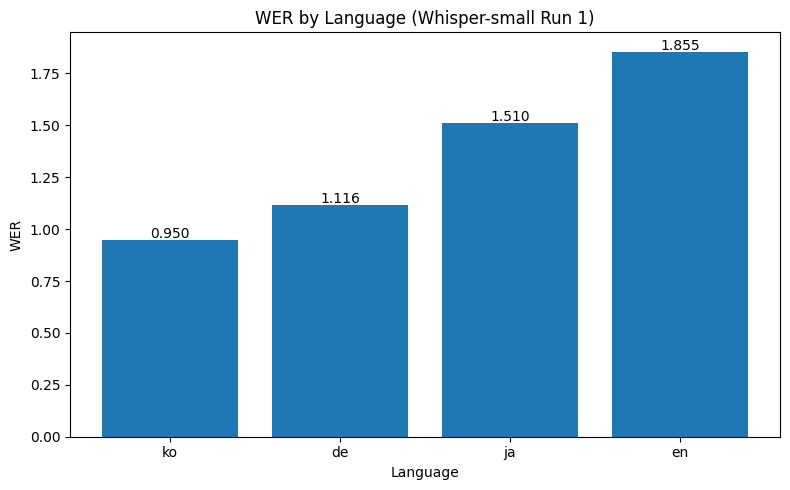

In [11]:
import matplotlib.pyplot as plt
import numpy as np

print("\n📊 WER 결과 (낮을수록 정확)")
for lang, score in sorted(lang_wer_results.items(), key=lambda x: x[1]):
    print(f"{lang.upper()} : {score:.4f}")

langs_sorted = [x[0] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]
scores_sorted = [x[1] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]

plt.figure(figsize=(8,5))
plt.bar(langs_sorted, scores_sorted)
plt.title("WER by Language (Whisper-small Run 1)")
plt.xlabel("Language")
plt.ylabel("WER")

for i, v in enumerate(scores_sorted):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.savefig("wer_small_run1.png")
plt.show()